* Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [53]:
import pyforest

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
df_pca = pd.read_excel("PCA India Data_Census.xlsx")

df_pca.head()

<IPython.core.display.Javascript object>

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [56]:
df_pca.tail()

State Code  Dist.Code                     State                Area Name  \
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
635   3333   8154  11781  1146  1203    21  ...             32             47   
636  10612  12346  21691  1544  1533  2234  ...            155            337   
637   1275   1549   2630   227   225     0  ...            104            134   
638   3762   5200   8012   723   664     0  ...            136            172   
639   7975  11977  18049  1470  1358     0  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[5 rows x 61 columns]

In [57]:
df_pca.shape

(640, 61)

In [58]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [59]:
df_pca.isna().sum()[df_pca.isna().sum()>0]

Series([], dtype: int64)

* No null values in any column

In [60]:
df_pca.describe().T.round(2)

count       mean        std    min       25%      50%  \
State Code      640.0      17.11       9.43    1.0      9.00     18.0   
Dist.Code       640.0     320.50     184.90    1.0    160.75    320.5   
No_HH           640.0   51222.87   48135.41  350.0  19484.00  35837.0   
TOT_M           640.0   79940.58   73384.51  391.0  30228.00  58339.0   
TOT_F           640.0  122372.08  113600.72  698.0  46517.75  87724.5   
M_06            640.0   12309.10   11500.91   56.0   4733.75   9159.0   
F_06            640.0   11942.30   11326.29   56.0   4672.25   8663.0   
M_SC            640.0   13820.95   14426.37    0.0   3466.25   9591.5   
F_SC            640.0   20778.39   21727.89    0.0   5603.25  13709.0   
M_ST            640.0    6191.81    9912.67    0.0    293.75   2333.5   
F_ST            640.0   10155.64   15875.70    0.0    429.50   3834.5   
M_LIT           640.0   57967.98   55910.28  286.0  21298.00  42693.5   
F_LIT           640.0   66359.57   75037.86  371.0  20932.00  43796.5   
M_ILL           640.0   21972.60   19825.61  105.0   8590.00  15767.5   
F_ILL           640.0   56012.52   47116.69  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.41   36419.54  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.76   37192.36  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.45   31480.92   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.85   29998.26  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.34    4739.16    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.04    5326.36    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.11    6399.51    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8926.00   12864.29    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.89    1278.64    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.77    3179.41    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.10   26068.48   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.04   18972.20  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.96    7410.79   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.91   10996.47  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.74    1311.55    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.68    3564.63    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.33    3781.56    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.28    6773.88    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.74     462.66    0.0     71.75    166.0   
MARG_HH_F       640.0     786.63    1198.72    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.15    3609.39    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.32    4115.19   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.17   39045.32  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.32   82970.41  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.99    6019.81   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.86    8467.47   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.85     905.64    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.58    2496.54    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.64    3059.59    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.85    5335.64    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.36     358.73    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.88     900.03    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.14    3036.96    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.55    3327.84   14.0    833.50   1834.5   
MARG_CL_0_3_M   640.0    1392.97    1489.71    4.0    489.50    949.0   
MARG_CL_0_3_F   640.0    2757.05    2788.78   30.0    957.25   1928.0   
MARG_AL_0_3_M   640.0     250.89     453.34    0.0     47.00    114.5   
MARG_AL_0_3_F   640.0     558.10    1117.64    0.0    109.00    247.5   
MARG_HH_0_3_M   640.0     560.69     762.58    0.0    136.50    308.0   
M

* Values are in different scale, so we must do scaling of the data. Either standard scaler or Min-Max-scaling.
* There is difference between mean and median values of few columns, hence we can expect outliers and/or skewness in the data.

In [61]:
df_pca.describe(include='object').T

count unique            top freq
State       640     35  Uttar Pradesh   71
Area Name   640    635        Raigarh    2

* Area Name column has 635 unique values out of 640 rows. Which is high likely that whole column is unique.
* Both State and Area Name do not add value to the further analysis. We can drop them before scaling or PCA analysis.


In [62]:
df_pca[df_pca.duplicated()]

Empty DataFrame
Columns: [State Code, Dist.Code, State, Area Name, No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F, MARGWORK_M, MARGWORK_F, MARG_CL_M, MARG_CL_F, MARG_AL_M, MARG_AL_F, MARG_HH_M, MARG_HH_F, MARG_OT_M, MARG_OT_F, MARGWORK_3_6_M, MARGWORK_3_6_F, MARG_CL_3_6_M, MARG_CL_3_6_F, MARG_AL_3_6_M, MARG_AL_3_6_F, MARG_HH_3_6_M, MARG_HH_3_6_F, MARG_OT_3_6_M, MARG_OT_3_6_F, MARGWORK_0_3_M, MARGWORK_0_3_F, MARG_CL_0_3_M, MARG_CL_0_3_F, MARG_AL_0_3_M, MARG_AL_0_3_F, MARG_HH_0_3_M, MARG_HH_0_3_F, MARG_OT_0_3_M, MARG_OT_0_3_F, NON_WORK_M, NON_WORK_F]
Index: []

[0 rows x 61 columns]

In [63]:
df_pca.nunique()

State Code        35
Dist.Code        640
State             35
Area Name        635
No_HH            639
                ... 
MARG_HH_0_3_F    539
MARG_OT_0_3_M    192
MARG_OT_0_3_F    320
NON_WORK_M       482
NON_WORK_F       504
Length: 61, dtype: int64

In [64]:
df_pca.State.value_counts()

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

In [65]:
df_pca['Area Name'].value_counts()

Raigarh          2
Bijapur          2
Aurangabad       2
Hamirpur         2
Bilaspur         2
                ..
Darbhanga        1
Muzaffarpur      1
Gopalganj        1
Siwan            1
South Andaman    1
Name: Area Name, Length: 635, dtype: int64

### EDA

* Univariate - Numerical Data

In [66]:
numerical_cols = df_pca.select_dtypes(exclude='object').columns.to_list()
numerical_cols

['State Code',
 'Dist.Code',
 'No_HH',
 'TOT_M',
 'TOT_F',
 'M_06',
 'F_06',
 'M_SC',
 'F_SC',
 'M_ST',
 'F_ST',
 'M_LIT',
 'F_LIT',
 'M_ILL',
 'F_ILL',
 'TOT_WORK_M',
 'TOT_WORK_F',
 'MAINWORK_M',
 'MAINWORK_F',
 'MAIN_CL_M',
 'MAIN_CL_F',
 'MAIN_AL_M',
 'MAIN_AL_F',
 'MAIN_HH_M',
 'MAIN_HH_F',
 'MAIN_OT_M',
 'MAIN_OT_F',
 'MARGWORK_M',
 'MARGWORK_F',
 'MARG_CL_M',
 'MARG_CL_F',
 'MARG_AL_M',
 'MARG_AL_F',
 'MARG_HH_M',
 'MARG_HH_F',
 'MARG_OT_M',
 'MARG_OT_F',
 'MARGWORK_3_6_M',
 'MARGWORK_3_6_F',
 'MARG_CL_3_6_M',
 'MARG_CL_3_6_F',
 'MARG_AL_3_6_M',
 'MARG_AL_3_6_F',
 'MARG_HH_3_6_M',
 'MARG_HH_3_6_F',
 'MARG_OT_3_6_M',
 'MARG_OT_3_6_F',
 'MARGWORK_0_3_M',
 'MARGWORK_0_3_F',
 'MARG_CL_0_3_M',
 'MARG_CL_0_3_F',
 'MARG_AL_0_3_M',
 'MARG_AL_0_3_F',
 'MARG_HH_0_3_M',
 'MARG_HH_0_3_F',
 'MARG_OT_0_3_M',
 'MARG_OT_0_3_F',
 'NON_WORK_M',
 'NON_WORK_F']

In [67]:
len(numerical_cols)

59

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

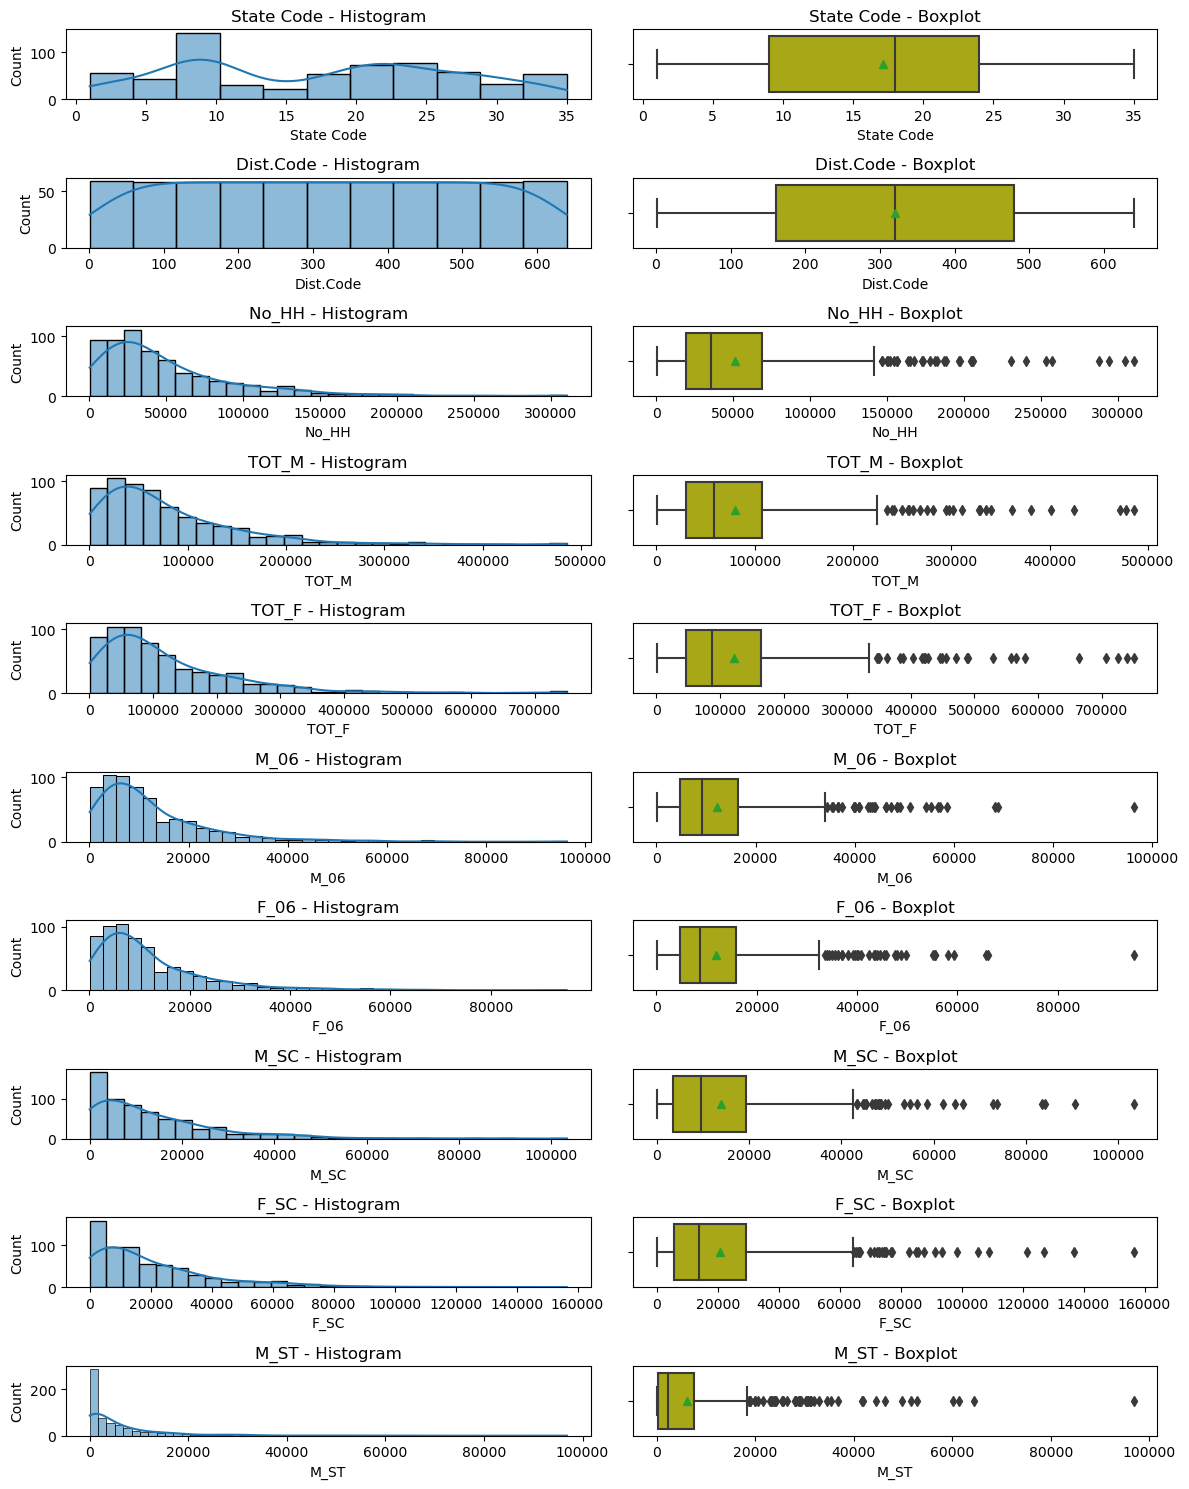

In [68]:
fig, axs = plt.subplots(len(numerical_cols[:10]),2,figsize=(12,15))
for row_id,col in enumerate(numerical_cols[:10]):
    sns.histplot(x=df_pca[col], kde=1, ax=axs[row_id,0])
    axs[row_id,0].set_title(f'{col} - Histogram')
    
    sns.boxplot(x=df_pca[col], showmeans=1, ax=axs[row_id,1], color='y')
    axs[row_id,1].set_title(f'{col} - Boxplot')
plt.tight_layout()
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

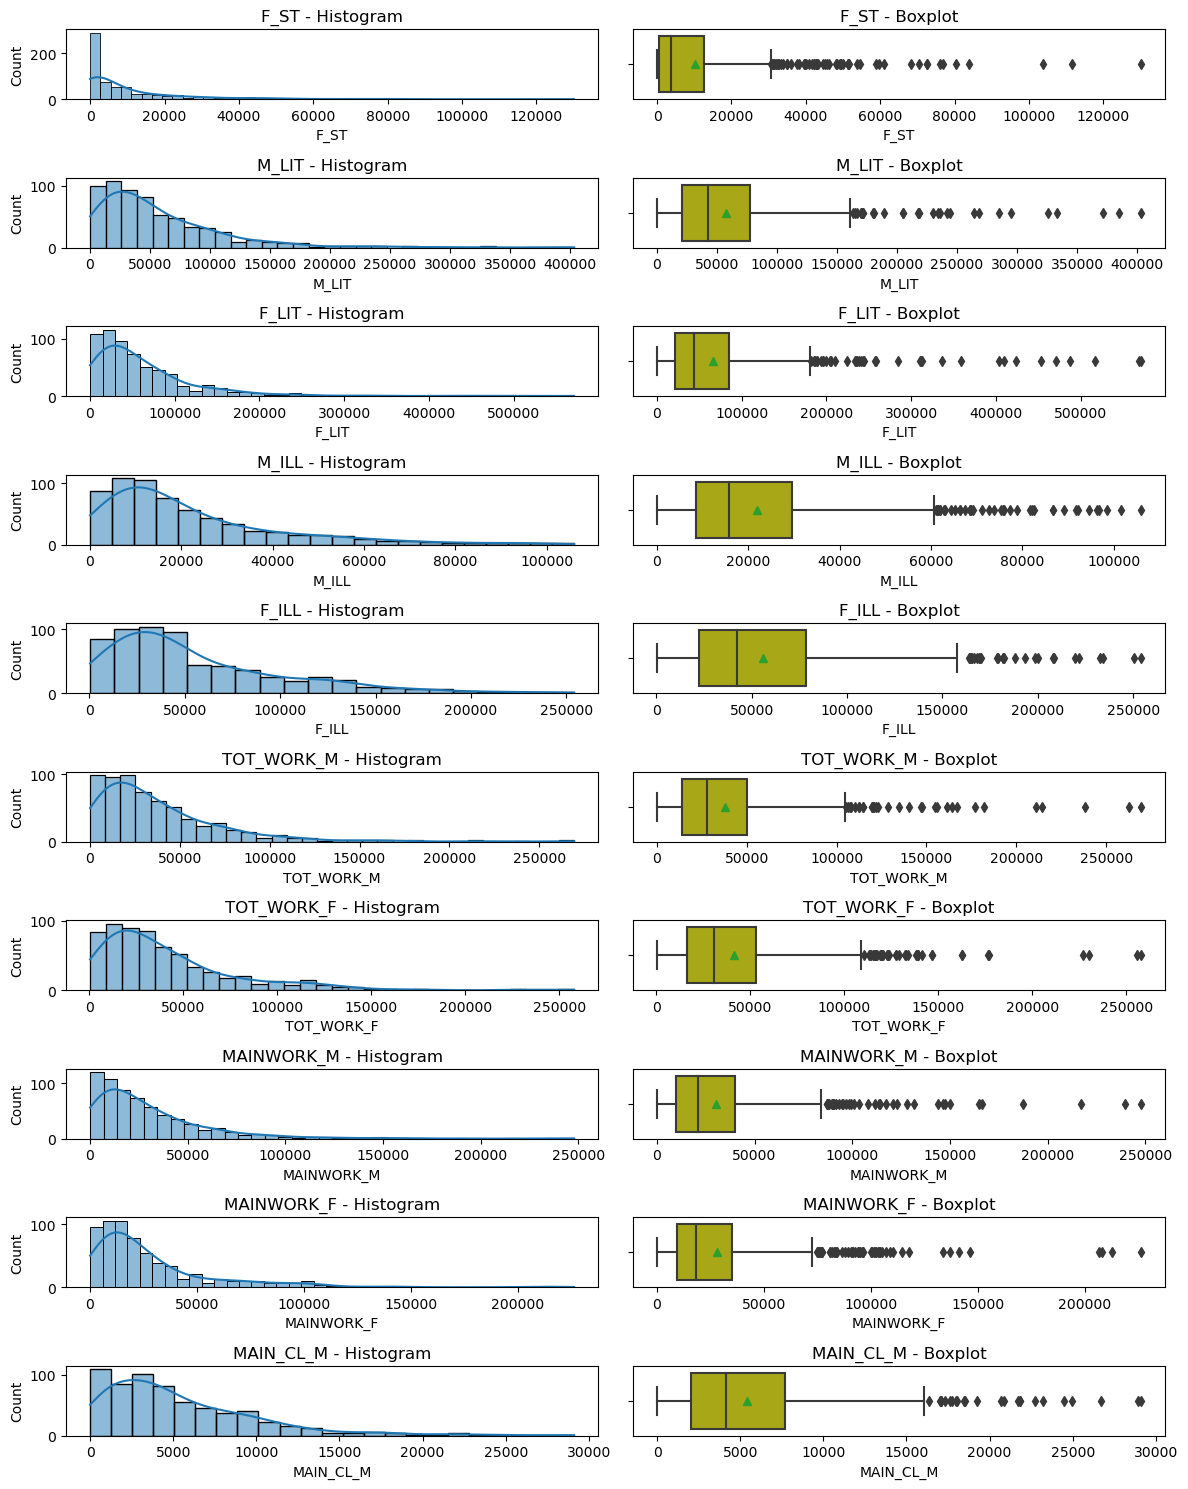

In [69]:
fig, axs = plt.subplots(len(numerical_cols[10:20]),2,figsize=(12,15))
for row_id,col in enumerate(numerical_cols[10:20]):
    sns.histplot(x=df_pca[col], kde=1, ax=axs[row_id,0])
    axs[row_id,0].set_title(f'{col} - Histogram')
    
    sns.boxplot(x=df_pca[col], showmeans=1, ax=axs[row_id,1], color='y')
    axs[row_id,1].set_title(f'{col} - Boxplot')
plt.tight_layout()
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

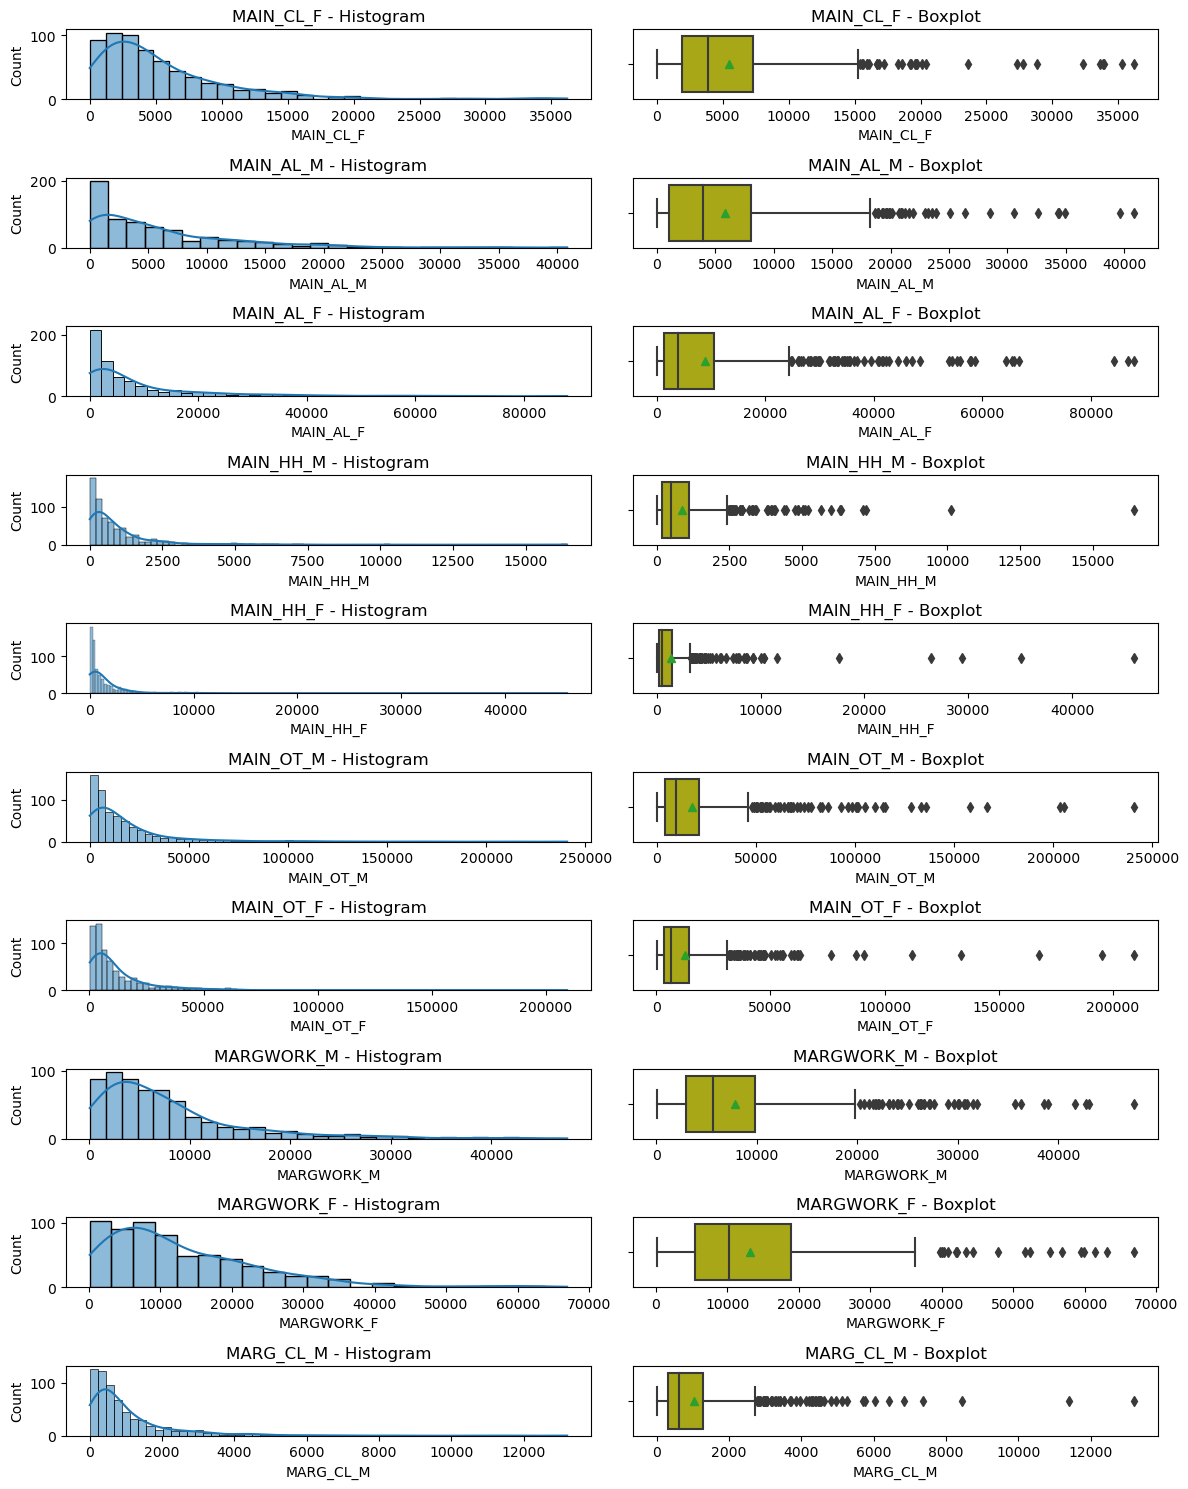

In [70]:
fig, axs = plt.subplots(len(numerical_cols[20:30]),2,figsize=(12,15))
for row_id,col in enumerate(numerical_cols[20:30]):
    sns.histplot(x=df_pca[col], kde=1, ax=axs[row_id,0])
    axs[row_id,0].set_title(f'{col} - Histogram')
    
    sns.boxplot(x=df_pca[col], showmeans=1, ax=axs[row_id,1], color='y')
    axs[row_id,1].set_title(f'{col} - Boxplot')
plt.tight_layout()
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

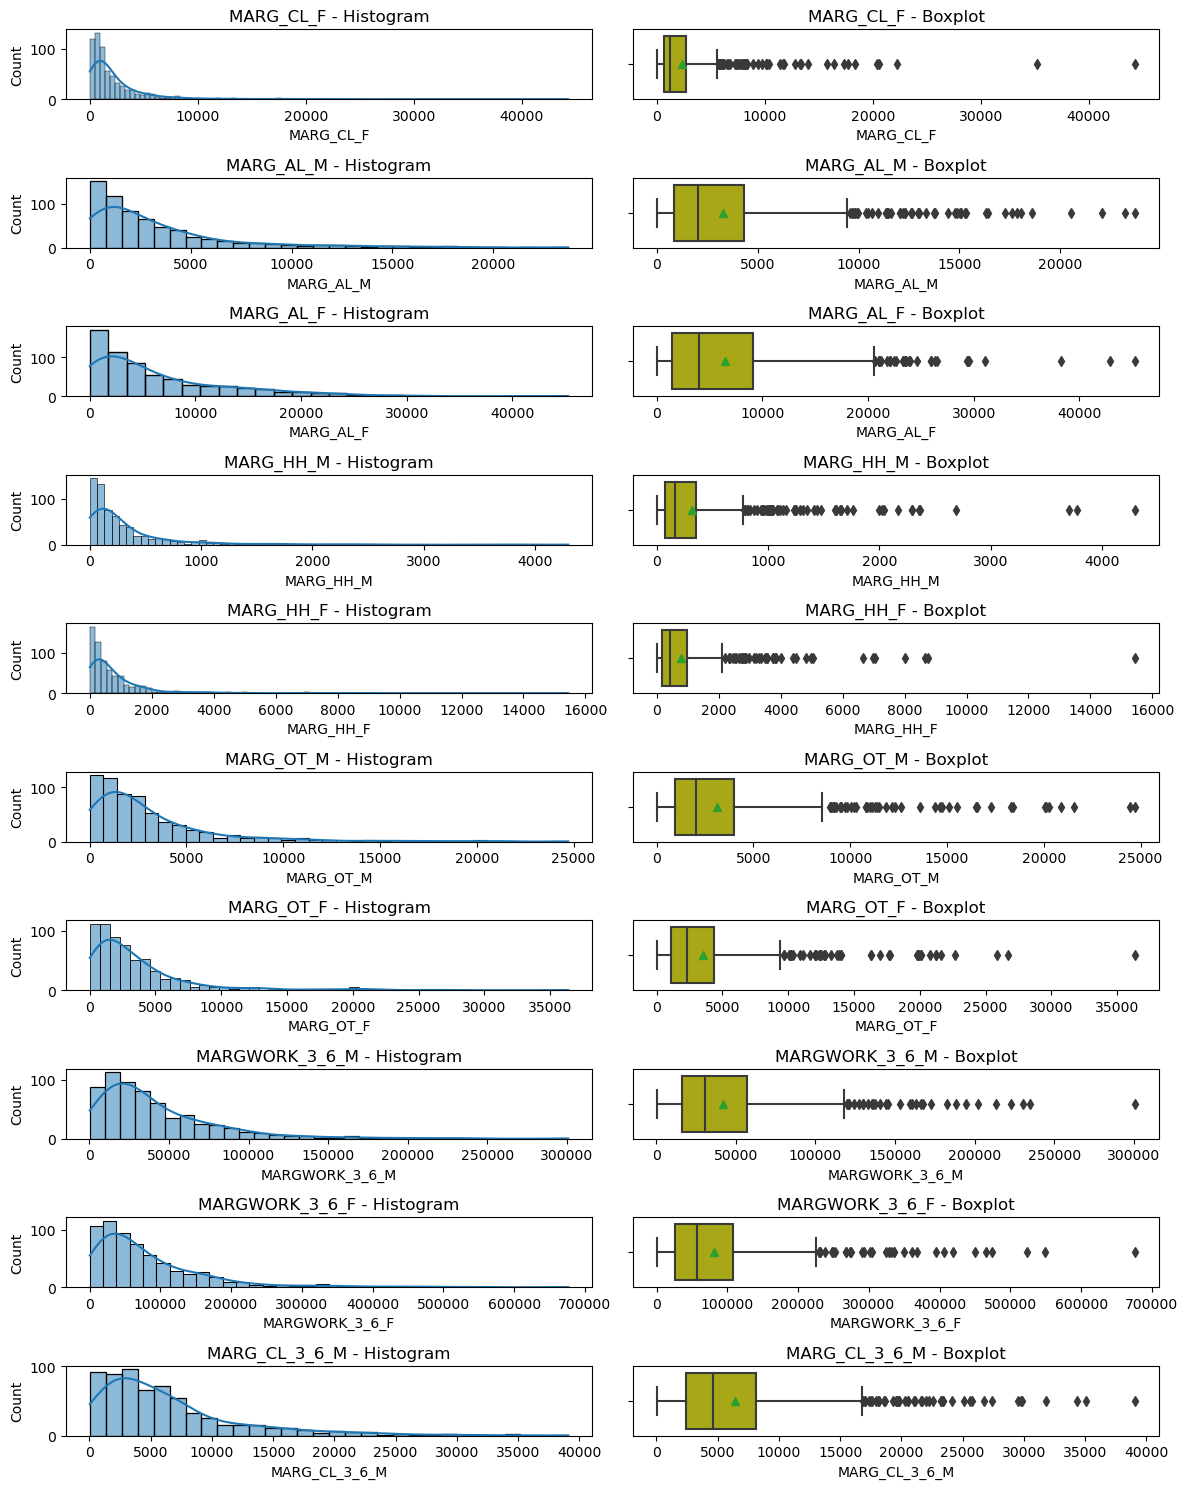

In [71]:
fig, axs = plt.subplots(len(numerical_cols[30:40]),2,figsize=(12,15))
for row_id,col in enumerate(numerical_cols[30:40]):
    sns.histplot(x=df_pca[col], kde=1, ax=axs[row_id,0])
    axs[row_id,0].set_title(f'{col} - Histogram')
    
    sns.boxplot(x=df_pca[col], showmeans=1, ax=axs[row_id,1], color='y')
    axs[row_id,1].set_title(f'{col} - Boxplot')
plt.tight_layout()
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

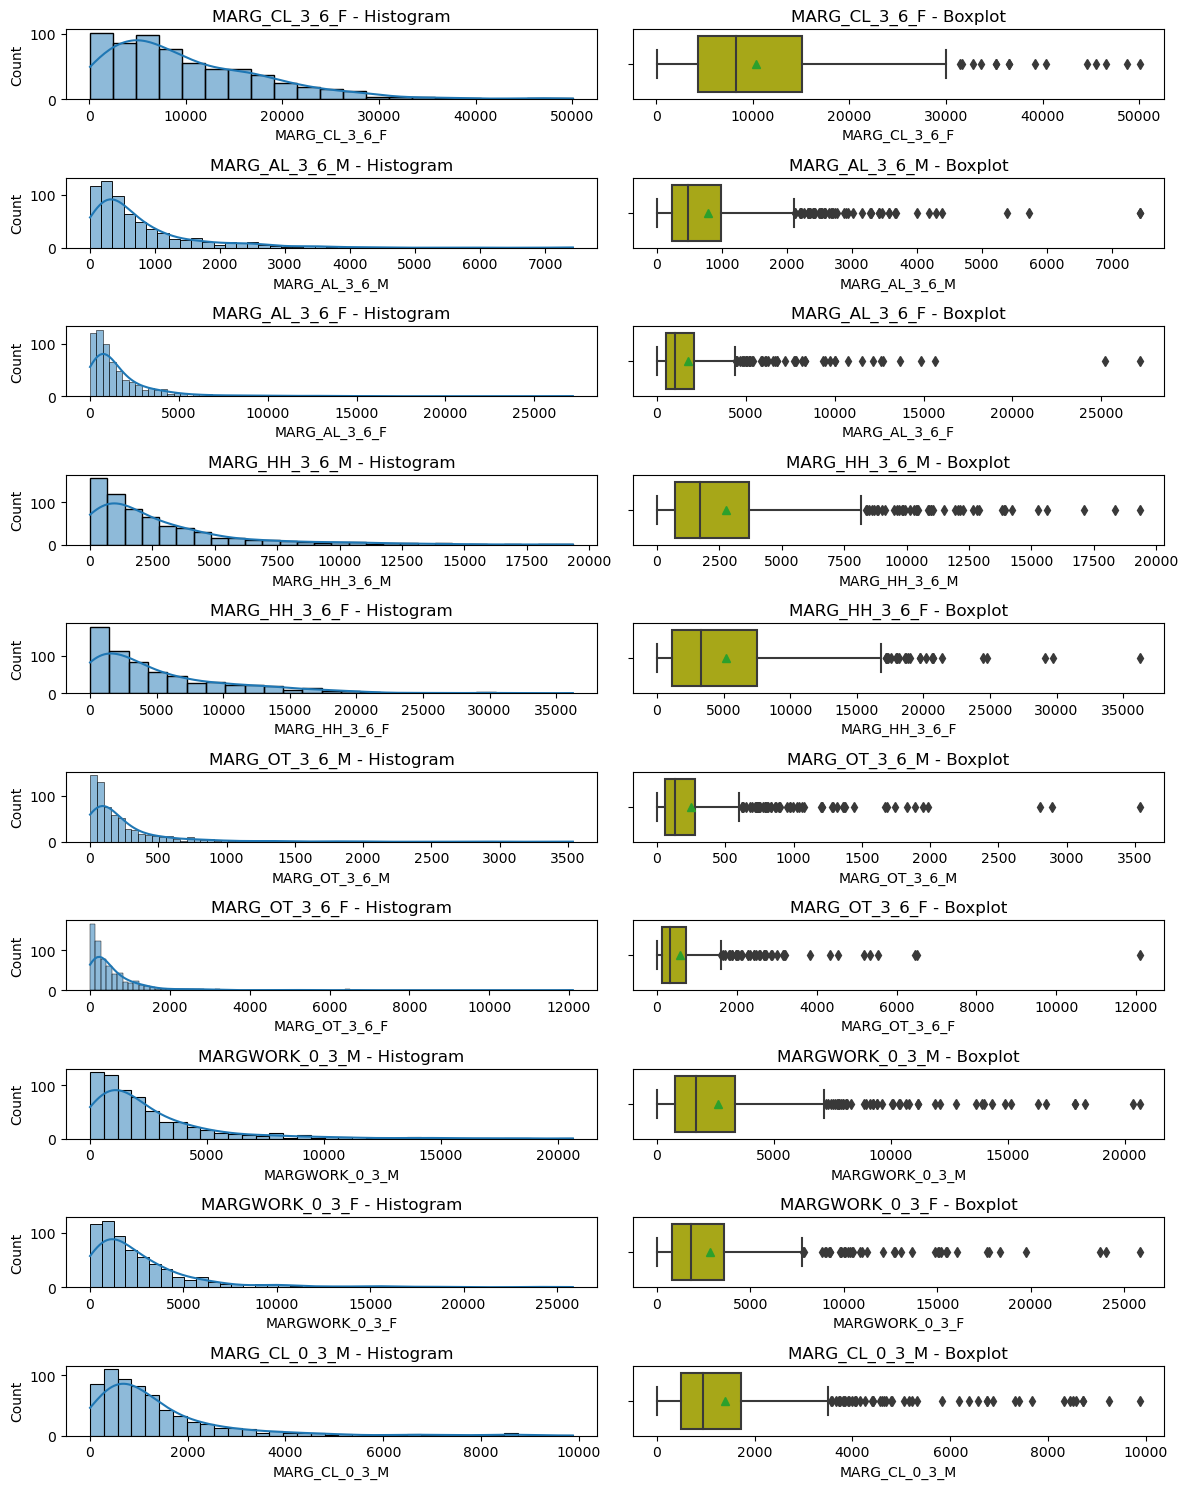

In [72]:
fig, axs = plt.subplots(len(numerical_cols[40:50]),2,figsize=(12,15))
for row_id,col in enumerate(numerical_cols[40:50]):
    sns.histplot(x=df_pca[col], kde=1, ax=axs[row_id,0])
    axs[row_id,0].set_title(f'{col} - Histogram')
    
    sns.boxplot(x=df_pca[col], showmeans=1, ax=axs[row_id,1], color='y')
    axs[row_id,1].set_title(f'{col} - Boxplot')
plt.tight_layout()
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

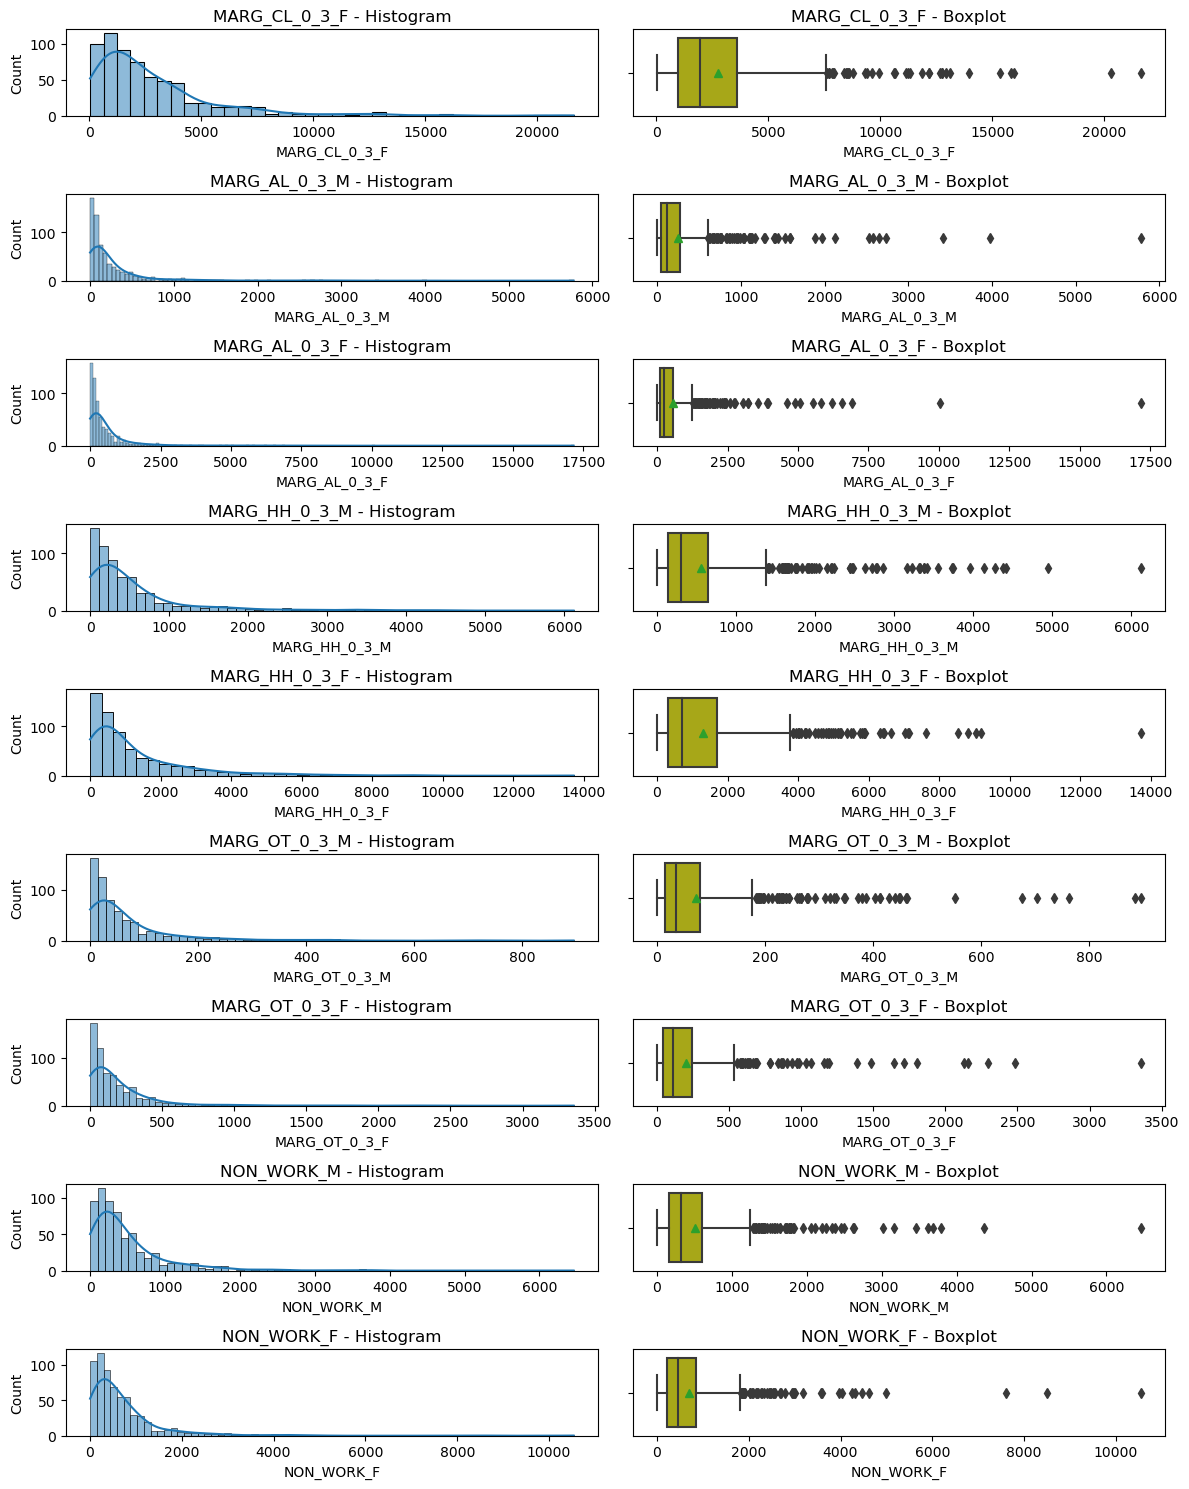

In [73]:
fig, axs = plt.subplots(len(numerical_cols[50:]),2,figsize=(12,15))
for row_id,col in enumerate(numerical_cols[50:]):
    sns.histplot(x=df_pca[col], kde=1, ax=axs[row_id,0])
    axs[row_id,0].set_title(f'{col} - Histogram')
    
    sns.boxplot(x=df_pca[col], showmeans=1, ax=axs[row_id,1], color='y')
    axs[row_id,1].set_title(f'{col} - Boxplot')
plt.tight_layout()
plt.show();

* Univariate - Categorical Data

In [74]:
categorical_cols = df_pca.select_dtypes(include='object').columns.to_list()
categorical_cols

['State', 'Area Name']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

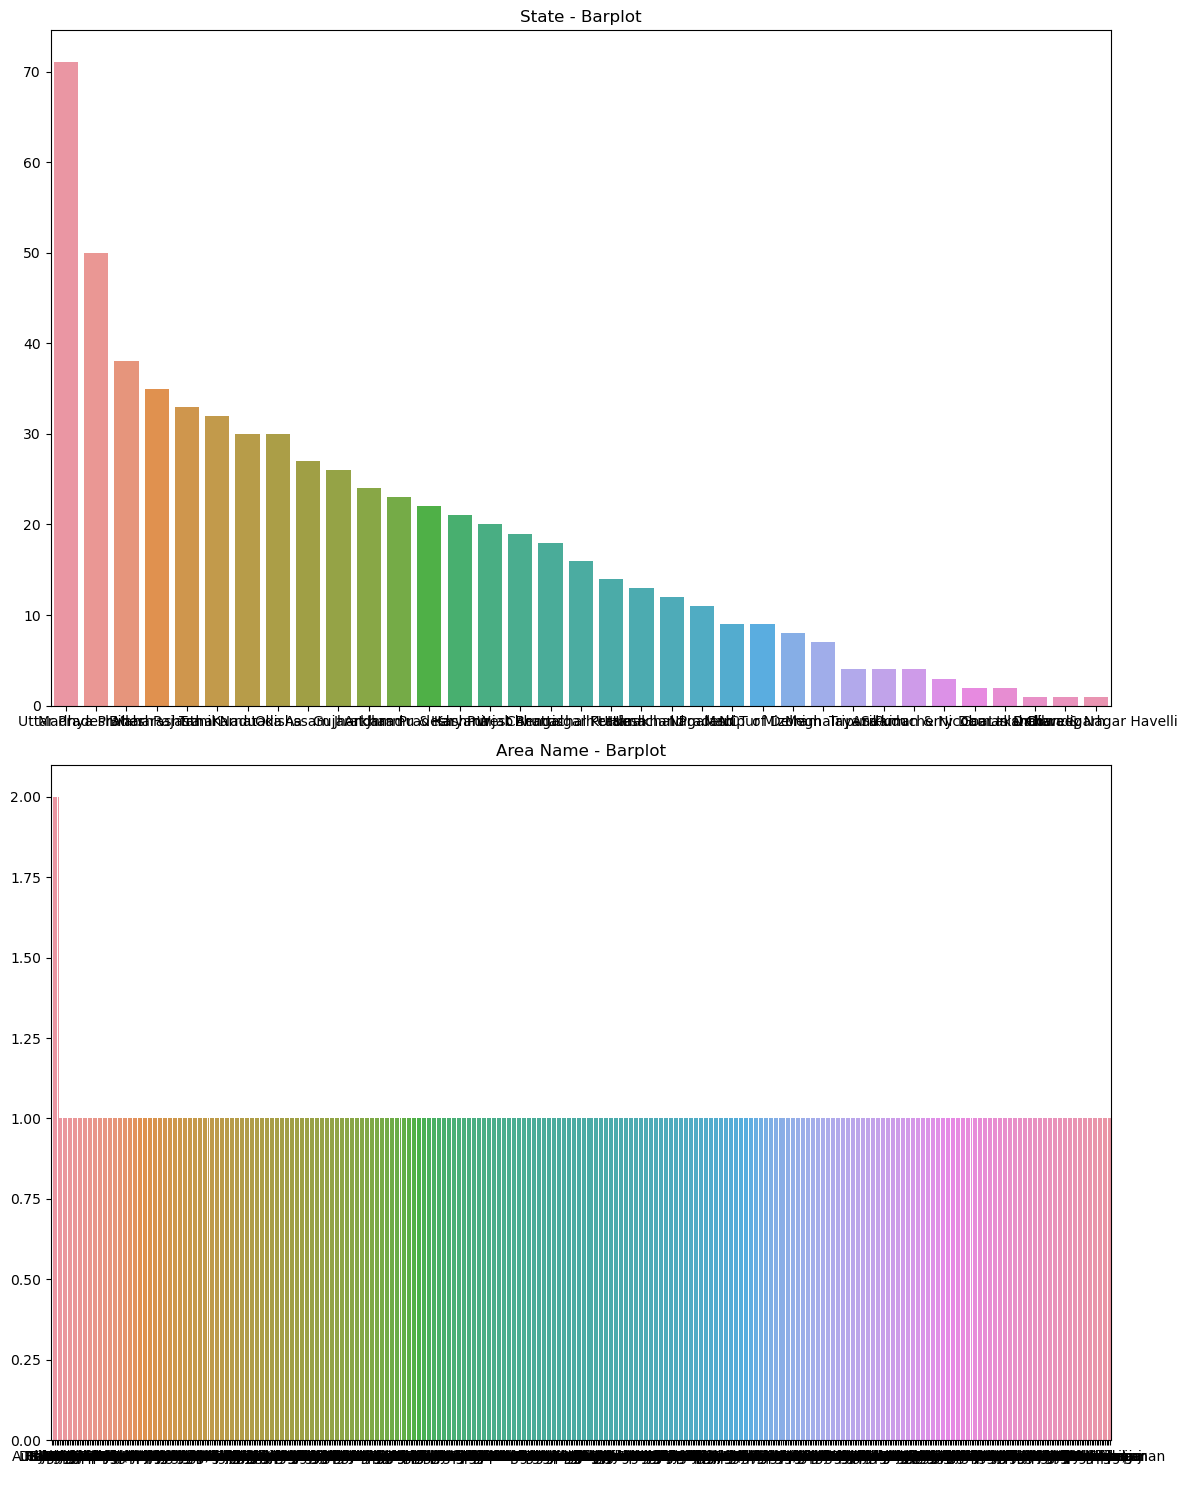

In [75]:
fig, axs = plt.subplots(len(categorical_cols),1,figsize=(12,15))
for row_id,col in enumerate(categorical_cols):
    sns.barplot(x=df_pca[col].value_counts().index, y=df_pca[col].value_counts().values, order=df_pca[col].value_counts().index, ax=axs[row_id])
    axs[row_id].set_title(f'{col} - Barplot')
plt.tight_layout()
plt.show()

In [76]:
for col in categorical_cols:
    print('*'*15+col+'*'*15)
    print(df_pca[col].value_counts(normalize=1)*100)
    print()

***************State***************
Uttar Pradesh               11.09375
Madhya Pradesh               7.81250
Bihar                        5.93750
Maharashtra                  5.46875
Rajasthan                    5.15625
Tamil Nadu                   5.00000
Karnataka                    4.68750
Odisha                       4.68750
Assam                        4.21875
Gujarat                      4.06250
Jharkhand                    3.75000
Andhra Pradesh               3.59375
Jammu & Kashmir              3.43750
Haryana                      3.28125
Punjab                       3.12500
West Bengal                  2.96875
Chhattisgarh                 2.81250
Arunachal Pradesh            2.50000
Kerala                       2.18750
Uttarakhand                  2.03125
Himachal Pradesh             1.87500
Nagaland                     1.71875
Manipur                      1.40625
NCT of Delhi                 1.40625
Mizoram                      1.25000
Meghalaya                    1.09375
Tr

* Perform detailed Exploratory analysis by creating certain questions like 
    - (i) Which state has highest gender ratio and which has the lowest? 
    - (ii) Which district has the highest & lowest gender ratio? (Example Questions). 
* Pick 5 variables out of the given 24 variables below for EDA: 
    - No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

In [77]:
df_pca.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [78]:
df_pca.columns

Index(['State Code', 'Dist.Code', 'State', 'Area Name', 'No_HH', 'TOT_M',
       'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT',
       'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M',
       'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F',
       'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M',
       'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F',
       'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M',
       'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M',
       'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M',
       'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M',
       'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M',
       'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M',
       'NON_WORK_F'],
      dtype='object')

In [79]:
df_eda = df_pca[['State Code', 'Dist.Code', 'State', 'Area Name','MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F']]
df_eda.head()

State Code  Dist.Code            State    Area Name  MAINWORK_M  \
0           1          1  Jammu & Kashmir      Kupwara        2763   
1           1          2  Jammu & Kashmir       Badgam        4628   
2           1          3  Jammu & Kashmir  Leh(Ladakh)        1940   
3           1          4  Jammu & Kashmir       Kargil         491   
4           1          5  Jammu & Kashmir        Punch        2523   

   MAINWORK_F  MAIN_CL_M  MAIN_CL_F  MAIN_AL_M  MAIN_AL_F  MAIN_HH_M  \
0        1275        486        235        407        143         78   
1        1733       1098        357        442        108        538   
2        2923        519       1205         36         71         19   
3         408         35        102          8         24          9   
4        2267        743        766        254        237         35   

   MAIN_HH_F  MAIN_OT_M  MAIN_OT_F  
0         86       1792        811  
1        343       2550        925  
2         55       1366       1592  
3          6        439        276  
4         64       1491       1200

* Let's do EDA about Main Workers from the dataset.
    - 1) On an average, Who are working more from all states combined? Males or Females?
    - 2) From where does the highest and lowest number of workers coming from?
        - 2a) States
        - 2b) Areas
    - 3) In cultivators sector, Does males or females participate more?
    - 4) In cultivators sector, From where does the highest and lowest number of workers coming from?
        - 4a) States
        - 4b) Areas
    - 5) In Agricultural sector, Does males or females participate more?
    - 6) In Agricultual sector, From where does the highest and lowest number of workers coming from?
        - 6a) States
        - 6b) Areas
    - 7) In Household industry, Does males or females participate more?
    - 8) In Household industry,From where does the highest and lowest number of workers coming from?
        - 8a) States
        - 8b) Areas
    - 9) In other workers/ Non-workers categroy, Does males or females participate more?
    - 10) In other workers/ Non-workers categroy, From where does the highest and lowest number of workers coming from?
        - 10a) States
        - 10b) Areas

In [80]:
df_eda.columns

Index(['State Code', 'Dist.Code', 'State', 'Area Name', 'MAINWORK_M',
       'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F',
       'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F'],
      dtype='object')

In [81]:
# 1) On an average, Who are working more from all states combined? Males or Females?

df_eda[['MAINWORK_M','MAINWORK_F']].describe().T.round(2)

count      mean       std    min      25%      50%       75%  \
MAINWORK_M  640.0  30204.45  31480.92   65.0  9787.00  21250.5  40119.00   
MAINWORK_F  640.0  28198.85  29998.26  240.0  9502.25  18484.0  35063.25   

                 max  
MAINWORK_M  247911.0  
MAINWORK_F  226166.0

In [82]:
print('Total Male workers are '+ str(df_eda.MAINWORK_M.sum()))
print('Total Female workers are '+ str(df_eda.MAINWORK_F.sum()))
print('Male workers are more by '+ str(df_eda.MAINWORK_M.sum() - df_eda.MAINWORK_F.sum()))

Total Male workers are 19330846
Total Female workers are 18047262
Male workers are more by 1283584


* We can see there are more main male workers compared to female workers. 
* But the difference is not very huge, which is 1283584

In [83]:
# 2) From where does the highest and lowest number of workers coming from?
# 2a) Which states?

df_eda['MainWork_M&F'] = df_eda['MAINWORK_M']+df_eda['MAINWORK_F']
df_eda.groupby(['State']).sum()['MainWork_M&F'].sort_values(ascending=False)

State
Uttar Pradesh               4279851
Maharashtra                 4260772
Andhra Pradesh              3633227
Tamil Nadu                  3430607
Karnataka                   3396328
West Bengal                 2903439
Bihar                       1735183
Kerala                      1733523
Madhya Pradesh              1690776
Gujarat                     1614907
Rajasthan                   1351530
Assam                       1025897
Punjab                       981862
Odisha                       956392
Chhattisgarh                 736430
Haryana                      673470
Jharkhand                    616812
NCT of Delhi                 593671
Uttarakhand                  399397
Himachal Pradesh             302643
Meghalaya                    207698
Jammu & Kashmir              175655
Manipur                      126281
Tripura                      125375
Goa                           90910
Nagaland                      75447
Puducherry                    61254
Mizoram               

In [84]:
# 2) From where does the highest and lowest number of workers coming from?
# 2b) Which areas?

df_eda.groupby(['Area Name']).sum()['MainWork_M&F'].sort_values(ascending=False)

Area Name
Mumbai Suburban               454498
Bangalore                     443359
Thane                         399846
North Twenty Four Parganas    380890
Pune                          351794
                               ...  
Upper Siang                     1325
Anjaw                           1072
Kargil                           899
Nicobars                         859
Dibang Valley                    305
Name: MainWork_M&F, Length: 635, dtype: int64

* *Uttar Pradesh and Maharashtra* states has more number of Main workers among all states i.e. 4,00,000+
* *Laksadweep* has very less Main workers i.e. 3711
<br></br>
* Areas *Mumbai Suburban and Bangalore* has 4,00,000+ Main workers.
* There are less than 1000 Main workers from *Kargil, Nicobars, and Dibang Valley* areas.

In [85]:
# 3) In cultivators sector, Does males or females participate more?

df_eda[['MAIN_CL_M', 'MAIN_CL_F']].describe().T.round(2)

count     mean      std  min      25%     50%      75%      max
MAIN_CL_M  640.0  5424.34  4739.16  0.0  2023.50  4160.5  7695.00  29113.0
MAIN_CL_F  640.0  5486.04  5326.36  0.0  1920.25  3908.5  7286.25  36193.0

In [86]:
print('In cultivator sector, Total Male workers are '+ str(df_eda.MAIN_CL_M.sum()))
print('In cultivator sector, Total Female workers are '+ str(df_eda.MAIN_CL_F.sum()))
print('In cultivator sector, Female workers are more by '+ str(df_eda.MAIN_CL_F.sum() - df_eda.MAIN_CL_M.sum()))

In cultivator sector, Total Male workers are 3471579
In cultivator sector, Total Female workers are 3511067
In cultivator sector, Female workers are more by 39488


In [87]:
# 4) In cultivators sector, From where does the highest and lowest number of workers coming from?
# 4a) Which states?

df_eda['Main_CL_M&F'] = df_eda['MAIN_CL_M']+df_eda['MAIN_CL_F']
df_eda.groupby(['State']).sum()['Main_CL_M&F'].sort_values(ascending=False)

State
Uttar Pradesh               1235393
Maharashtra                  700470
Karnataka                    641165
Rajasthan                    495754
Andhra Pradesh               417524
Madhya Pradesh               395113
Bihar                        369565
Tamil Nadu                   354209
West Bengal                  268677
Assam                        265511
Gujarat                      238446
Chhattisgarh                 210393
Punjab                       201055
Odisha                       186028
Uttarakhand                  182522
Haryana                      173778
Jharkhand                    161048
Himachal Pradesh             133931
Meghalaya                     75298
Kerala                        57937
Manipur                       50953
Nagaland                      43531
Jammu & Kashmir               36251
Mizoram                       25779
Arunachal Pradesh             22928
Tripura                       18644
Sikkim                         8836
Goa                   

In [88]:
# 4) In cultivators sector, From where does the highest and lowest number of workers coming from?
# 4b) Which areas?

df_eda.groupby(['Area Name']).sum()['Main_CL_M&F'].sort_values(ascending=False)

Area Name
Jaunpur        60613
Satara         56896
Kolhapur       53281
Pune           50187
Mahbubnagar    49571
               ...  
Nicobars          16
Mahe              11
New Delhi          9
Yanam              5
Lakshadweep        0
Name: Main_CL_M&F, Length: 635, dtype: int64

* *Uttar Pradesh* has more number of Cultivator workers among all states i.e. 12+ lakhs.
* *Laksadweep* has NO cultivator workers.
<br></br>
* Area *Jaunpur* has 60,000+ Cultivator workers.
* There are <10 Cultivator workers from *New Delhi and Yanam* areas.

In [89]:
# 5) In Agricultural sector, Does males or females participate more?

df_eda[['MAIN_AL_M', 'MAIN_AL_F']].describe().T.round(2)

count     mean       std  min      25%     50%       75%      max
MAIN_AL_M  640.0  5849.11   6399.51  0.0  1070.25  3936.5   8067.25  40843.0
MAIN_AL_F  640.0  8926.00  12864.29  0.0  1408.75  3933.5  10617.50  87945.0

In [90]:
print('In Agricultural sector, Total Male workers are '+ str(df_eda.MAIN_AL_M.sum()))
print('In Agricultural sector, Total Female workers are '+ str(df_eda.MAIN_AL_F.sum()))
print('In Agricultural sector, Female workers are more by '+ str(df_eda.MAIN_AL_F.sum() - df_eda.MAIN_AL_M.sum()))

In Agricultural sector, Total Male workers are 3743430
In Agricultural sector, Total Female workers are 5712637
In Agricultural sector, Female workers are more by 1969207


In [91]:
# 6) In Agricultural sector, From where does the highest and lowest number of workers coming from?
# 6a) Which states?

df_eda['Main_AL_M&F'] = df_eda['MAIN_AL_M']+df_eda['MAIN_AL_F']
df_eda.groupby(['State']).sum()['Main_AL_M&F'].sort_values(ascending=False)

State
Andhra Pradesh              1659383
Maharashtra                 1209055
Tamil Nadu                  1053984
Uttar Pradesh                940030
Karnataka                    888434
Bihar                        774104
West Bengal                  554707
Madhya Pradesh               506286
Gujarat                      458278
Odisha                       241867
Chhattisgarh                 237823
Kerala                       178043
Rajasthan                    162642
Assam                        124454
Punjab                       124183
Jharkhand                    117554
Haryana                       86352
Meghalaya                     33611
Uttarakhand                   27535
Tripura                       25591
Jammu & Kashmir               10009
Puducherry                     9007
Himachal Pradesh               8931
Manipur                        6931
Mizoram                        4842
NCT of Delhi                   3546
Nagaland                       2448
Goa                   

In [92]:
# 6) In Agricultural sector, From where does the highest and lowest number of workers coming from?
# 6b) Which areas?

df_eda.groupby(['Area Name']).sum()['Main_AL_M&F'].sort_values(ascending=False)

Area Name
Kurnool          123772
Mahbubnagar      121826
Guntur           116477
East Godavari     98816
Jalgaon           97307
                  ...  
Lahul & Spiti        25
Anjaw                12
Nicobars              2
Dibang Valley         1
Lakshadweep           0
Name: Main_AL_M&F, Length: 635, dtype: int64

* *Andhra Pradesh* has more number of Agricultural workers among all states i.e. 15+ lakhs.
* *Laksadweep* has NO Agricultural workers.
<br></br>
* Area *Kurnool* has 1,20,000+ Agricultural workers.
* There are <10 Agricultural workers from *Nicobars and Dibang Valley* areas.

In [93]:
# 7) In Household industry, Does males or females participate more?

df_eda[['MAIN_HH_M', 'MAIN_HH_F']].describe().T.round(2)

count     mean      std  min     25%    50%      75%      max
MAIN_HH_M  640.0   883.89  1278.64  0.0  187.50  498.5  1099.25  16429.0
MAIN_HH_F  640.0  1380.77  3179.41  0.0  248.75  540.5  1435.75  45979.0

In [94]:
print('In Household industry, Total Male workers are '+ str(df_eda.MAIN_HH_M.sum()))
print('In Household industry, Total Female workers are '+ str(df_eda.MAIN_HH_F.sum()))
print('In Household industry, Female workers are more by '+ str(df_eda.MAIN_HH_F.sum() - df_eda.MAIN_HH_M.sum()))

In Household industry, Total Male workers are 565692
In Household industry, Total Female workers are 883695
In Household industry, Female workers are more by 318003


In [95]:
# 8) In Household industry, From where does the highest and lowest number of workers coming from?
# 8a) Which states?

df_eda['Main_HH_M&F'] = df_eda['MAIN_HH_M']+df_eda['MAIN_HH_F']
df_eda.groupby(['State']).sum()['Main_HH_M&F'].sort_values(ascending=False)

State
Uttar Pradesh               263928
West Bengal                 190047
Andhra Pradesh              149919
Tamil Nadu                  141510
Karnataka                   126662
Maharashtra                 116498
Bihar                        71819
Madhya Pradesh               60556
Odisha                       43511
Punjab                       39676
Assam                        37379
Rajasthan                    35575
Kerala                       35239
Gujarat                      24139
Jharkhand                    22017
Haryana                      20511
NCT of Delhi                 18875
Chhattisgarh                 11402
Uttarakhand                   9689
Manipur                       8262
Jammu & Kashmir               5591
Himachal Pradesh              4422
Tripura                       2937
Meghalaya                     2321
Goa                           2100
Nagaland                      1223
Puducherry                    1139
Mizoram                        864
Arunachal Prad

In [96]:
# 8) In Household industry, From where does the highest and lowest number of workers coming from?
# 8b) Which areas?

df_eda.groupby(['Area Name']).sum()['Main_HH_M&F'].sort_values(ascending=False)

Area Name
Dakshina Kannada           48589
Murshidabad                42257
Tirunelveli                31469
Nizamabad                  28563
Haora                      26799
                           ...  
North  & Middle Andaman       15
Lower Dibang Valley           14
Tawang                        11
Anjaw                          8
Dibang Valley                  0
Name: Main_HH_M&F, Length: 635, dtype: int64

* *Uttar Pradesh* has more number of Household workers among all states i.e. 2.5+ lakhs.
* *Laksadweep and Daman & Diu* has <100 Household workers.
<br></br>
* Area *Dakshina Kannada and Murshidabad* has 40,000+ Household workers.
* There are <10 Household workers from *Anjaw and Dibang Valley* areas.

In [97]:
# 9) In other workers/Non-workers categroy, Does males or females participate more?

df_eda[['MAIN_OT_M', 'MAIN_OT_F']].describe().T.round(2)

count      mean       std    min     25%     50%       75%  \
MAIN_OT_M  640.0  18047.10  26068.48   36.0  3997.5  9598.0  21249.50   
MAIN_OT_F  640.0  12406.04  18972.20  153.0  3142.5  6380.5  14368.25   

                max  
MAIN_OT_M  240855.0  
MAIN_OT_F  209355.0

In [98]:
print('In other workers/Non-workers categroy, Total Male workers are '+ str(df_eda.MAIN_OT_M.sum()))
print('In other workers/Non-workers categroy, Total Female workers are '+ str(df_eda.MAIN_OT_F.sum()))
print('In other workers/Non-workers categroy, Male workers are more by '+ str(df_eda.MAIN_OT_M.sum() - df_eda.MAIN_OT_F.sum()))

In other workers/Non-workers categroy, Total Male workers are 11550145
In other workers/Non-workers categroy, Total Female workers are 7939863
In other workers/Non-workers categroy, Male workers are more by 3610282


In [99]:
# 10) In other workers/Non-workers categroy, From where does the highest and lowest number of workers coming from?
# 10a) Which states?

df_eda['Main_OT_M&F'] = df_eda['MAIN_OT_M']+df_eda['MAIN_OT_F']
df_eda.groupby(['State']).sum()['Main_OT_M&F'].sort_values(ascending=False)

State
Maharashtra                 2234749
West Bengal                 1890008
Tamil Nadu                  1880904
Uttar Pradesh               1840500
Karnataka                   1740067
Kerala                      1462304
Andhra Pradesh              1406401
Gujarat                      894044
Madhya Pradesh               728821
Rajasthan                    657559
Punjab                       616948
Assam                        598553
NCT of Delhi                 567896
Bihar                        519695
Odisha                       484986
Haryana                      392829
Jharkhand                    316193
Chhattisgarh                 276812
Uttarakhand                  179651
Himachal Pradesh             155359
Jammu & Kashmir              123804
Meghalaya                     96468
Goa                           82088
Tripura                       78203
Manipur                       60135
Puducherry                    50016
Chandigarh                    33498
Mizoram               

In [100]:
# 10) In other workers/Non-workers categroy, From where does the highest and lowest number of workers coming from?
# 10b) Which areas?

df_eda.groupby(['Area Name']).sum()['Main_OT_M&F'].sort_values(ascending=False)

Area Name
Mumbai Suburban               436142
Bangalore                     413031
Thane                         333934
North Twenty Four Parganas    317353
Kolkata                       249100
                               ...  
Kiphire                          369
Kurung Kumey                     356
Anjaw                            231
Longleng                         231
Dibang Valley                    201
Name: Main_OT_M&F, Length: 635, dtype: int64

* *Uttar Pradesh* has more number of other workers/Non-workers categroy workers among all states i.e. 20+ lakhs.
* *Laksadweep, Dadara & Nagar Havelli, and Daman & Diu* has <10000 other workers/Non-workers categroy workers.
<br></br>
* Area *Mumbai Suburban and Bangalore* has 4,00,000+ other workers/Non-workers categroy workers.
* There are <300 other workers/Non-workers categroy workers from *Anjaw, Longleng, and Dibang Valley* areas.

* We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?
    - No, we should not treat outliers in this dataset.
    - Reason beacause, we are handling with Population census data where every outlier represents different demographical or geographical representations of the population.
    - It is not recommended to treat outliers when dealing with Population like census data. Hence, robust analysis required before taking any action on the outliers in the dataset.

* Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

In [101]:
df_pca.columns

Index(['State Code', 'Dist.Code', 'State', 'Area Name', 'No_HH', 'TOT_M',
       'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT',
       'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M',
       'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F',
       'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M',
       'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F',
       'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M',
       'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M',
       'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M',
       'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M',
       'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M',
       'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M',
       'NON_WORK_F'],
      dtype='object')

In [102]:
df_pca_num = df_pca.drop(['State Code', 'Dist.Code', 'State', 'Area Name'], axis=1)
df_pca_num.head()

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST   F_ST  M_LIT  ...  \
0   7707  23388  29796  5862  6196     3     0  1999   2598  13381  ...   
1   6218  19585  23102  4482  3733     7     6   427    517  10513  ...   
2   4452   6546  10964  1082  1018     3     6  5806   9723   4534  ...   
3   1320   2784   4206   563   677     0     0  2666   3968   1842  ...   
4  11654  20591  29981  5157  4587    20    33  7670  10843  13243  ...   

   MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  \
0           1150            749            180            237            680   
1            525            715            123            229            186   
2            114            188             44             89              3   
3            194            247             61            128             13   
4            874           1928            465           1043            205   

   MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0            252             32             46         258         214  
1            148             76            178         140         160  
2             34              0              4          67          61  
3             50              4             10         116          59  
4            302             24            105         180         478  

[5 rows x 57 columns]

In [103]:
df_pca_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   No_HH           640 non-null    int64
 1   TOT_M           640 non-null    int64
 2   TOT_F           640 non-null    int64
 3   M_06            640 non-null    int64
 4   F_06            640 non-null    int64
 5   M_SC            640 non-null    int64
 6   F_SC            640 non-null    int64
 7   M_ST            640 non-null    int64
 8   F_ST            640 non-null    int64
 9   M_LIT           640 non-null    int64
 10  F_LIT           640 non-null    int64
 11  M_ILL           640 non-null    int64
 12  F_ILL           640 non-null    int64
 13  TOT_WORK_M      640 non-null    int64
 14  TOT_WORK_F      640 non-null    int64
 15  MAINWORK_M      640 non-null    int64
 16  MAINWORK_F      640 non-null    int64
 17  MAIN_CL_M       640 non-null    int64
 18  MAIN_CL_F       640 non-null  

In [104]:
#from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_pca_num_scaled= ss.fit_transform(df_pca_num)
df_pca_num_scaled = pd.DataFrame(df_pca_num_scaled, columns=df_pca_num.columns)

df_pca_num_scaled.head()

<IPython.core.display.Javascript object>

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0 -0.904738 -0.771236 -0.815563 -0.561012 -0.507738 -0.958575 -0.957049   
1 -0.935695 -0.823100 -0.874534 -0.681096 -0.725367 -0.958297 -0.956772   
2 -0.972412 -1.000919 -0.981466 -0.976956 -0.965262 -0.958575 -0.956772   
3 -1.037530 -1.052224 -1.041001 -1.022118 -0.995393 -0.958783 -0.957049   
4 -0.822676 -0.809381 -0.813933 -0.622359 -0.649908 -0.957395 -0.955529   

       M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -0.423306 -0.476423 -0.798097  ...      -0.163229      -0.720610   
1 -0.582014 -0.607607 -0.849434  ...      -0.583103      -0.732811   
2 -0.038951 -0.027273 -0.956457  ...      -0.859212      -0.921931   
3 -0.355965 -0.390060 -1.004643  ...      -0.805468      -0.900758   
4  0.149238  0.043330 -0.800568  ...      -0.348645      -0.297513   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.156494      -0.287524       0.156577      -0.657412      -0.365258   
1      -0.282327      -0.294688      -0.491731      -0.723062       0.042855   
2      -0.456727      -0.420050      -0.731894      -0.795026      -0.662068   
3      -0.419198      -0.385127      -0.718770      -0.784926      -0.624966   
4       0.472670       0.434200      -0.466796      -0.625849      -0.439461   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.499977   -0.413053   -0.539614  
1      -0.073481   -0.606455   -0.598988  
2      -0.635680   -0.726103   -0.707839  
3      -0.616294   -0.645791   -0.710038  
4      -0.309346   -0.540895   -0.249344  

[5 rows x 57 columns]

In [105]:
numerical_cols = df_pca_num_scaled.columns.to_list()
numerical_cols

['No_HH',
 'TOT_M',
 'TOT_F',
 'M_06',
 'F_06',
 'M_SC',
 'F_SC',
 'M_ST',
 'F_ST',
 'M_LIT',
 'F_LIT',
 'M_ILL',
 'F_ILL',
 'TOT_WORK_M',
 'TOT_WORK_F',
 'MAINWORK_M',
 'MAINWORK_F',
 'MAIN_CL_M',
 'MAIN_CL_F',
 'MAIN_AL_M',
 'MAIN_AL_F',
 'MAIN_HH_M',
 'MAIN_HH_F',
 'MAIN_OT_M',
 'MAIN_OT_F',
 'MARGWORK_M',
 'MARGWORK_F',
 'MARG_CL_M',
 'MARG_CL_F',
 'MARG_AL_M',
 'MARG_AL_F',
 'MARG_HH_M',
 'MARG_HH_F',
 'MARG_OT_M',
 'MARG_OT_F',
 'MARGWORK_3_6_M',
 'MARGWORK_3_6_F',
 'MARG_CL_3_6_M',
 'MARG_CL_3_6_F',
 'MARG_AL_3_6_M',
 'MARG_AL_3_6_F',
 'MARG_HH_3_6_M',
 'MARG_HH_3_6_F',
 'MARG_OT_3_6_M',
 'MARG_OT_3_6_F',
 'MARGWORK_0_3_M',
 'MARGWORK_0_3_F',
 'MARG_CL_0_3_M',
 'MARG_CL_0_3_F',
 'MARG_AL_0_3_M',
 'MARG_AL_0_3_F',
 'MARG_HH_0_3_M',
 'MARG_HH_0_3_F',
 'MARG_OT_0_3_M',
 'MARG_OT_0_3_F',
 'NON_WORK_M',
 'NON_WORK_F']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

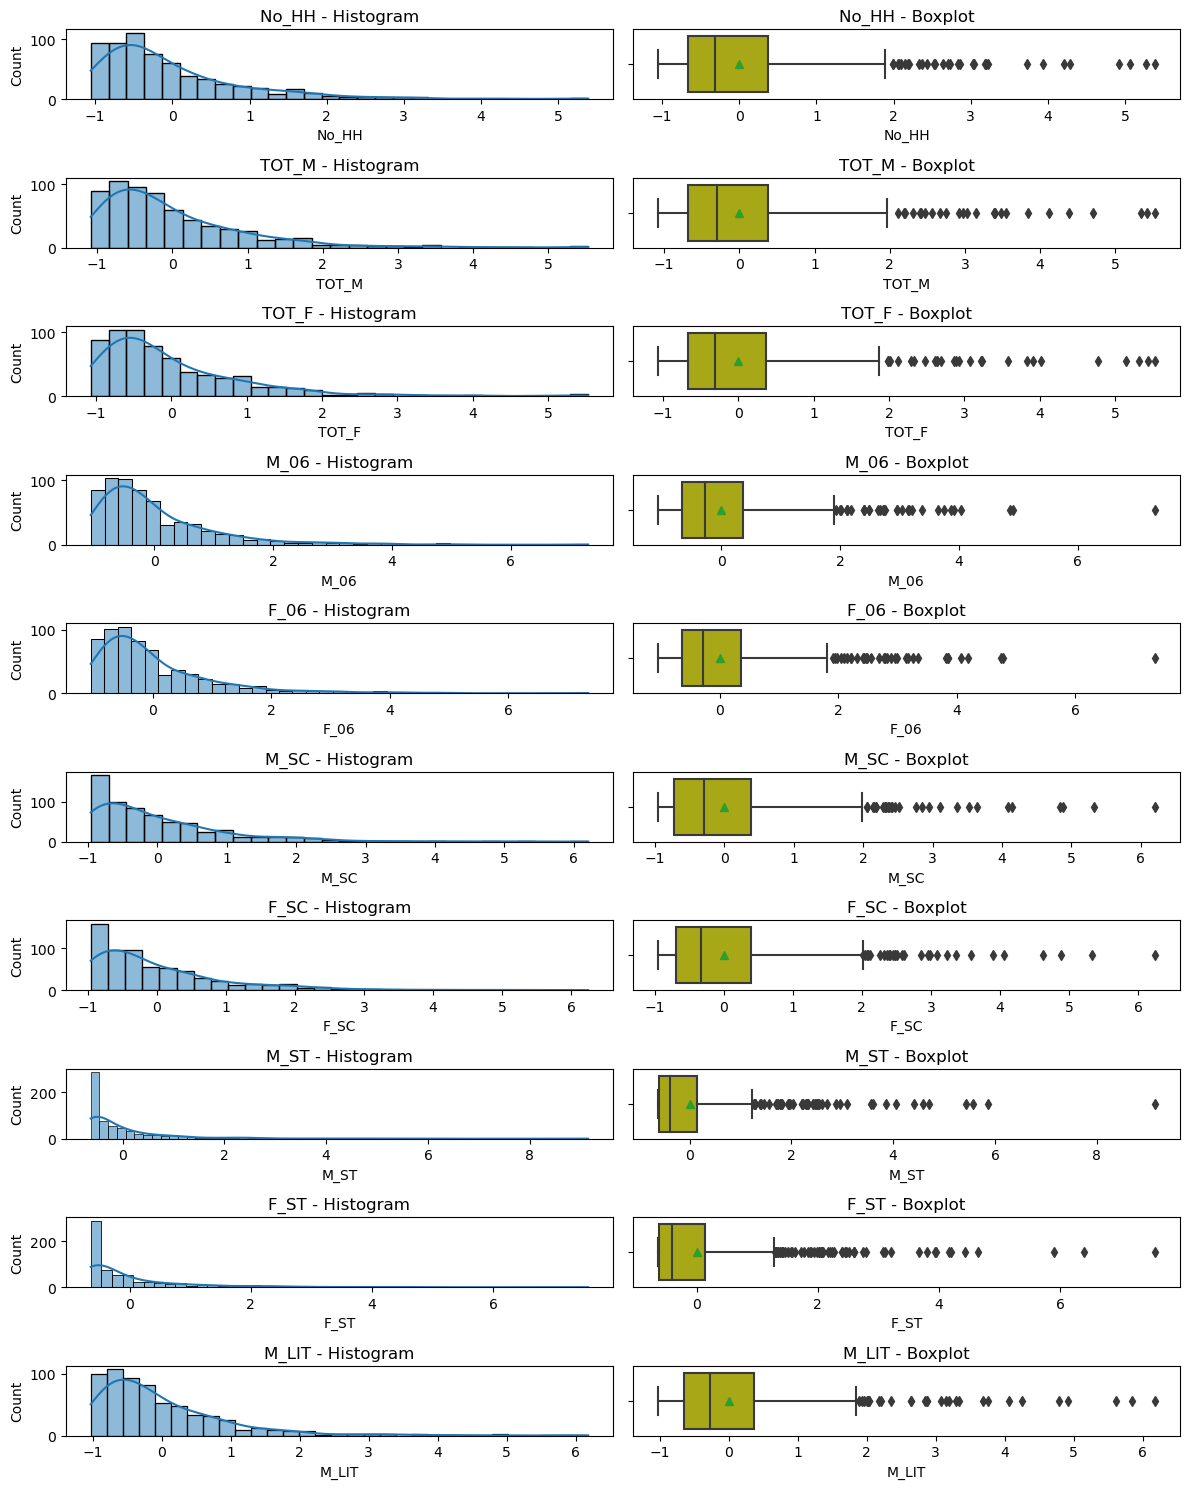

In [106]:
fig, axs = plt.subplots(len(numerical_cols[:10]),2,figsize=(12,15))
for row_id,col in enumerate(numerical_cols[:10]):
    sns.histplot(x=df_pca_num_scaled[col], kde=1, ax=axs[row_id,0])
    axs[row_id,0].set_title(f'{col} - Histogram')
    
    sns.boxplot(x=df_pca_num_scaled[col], showmeans=1, ax=axs[row_id,1], color='y')
    axs[row_id,1].set_title(f'{col} - Boxplot')
plt.tight_layout()
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

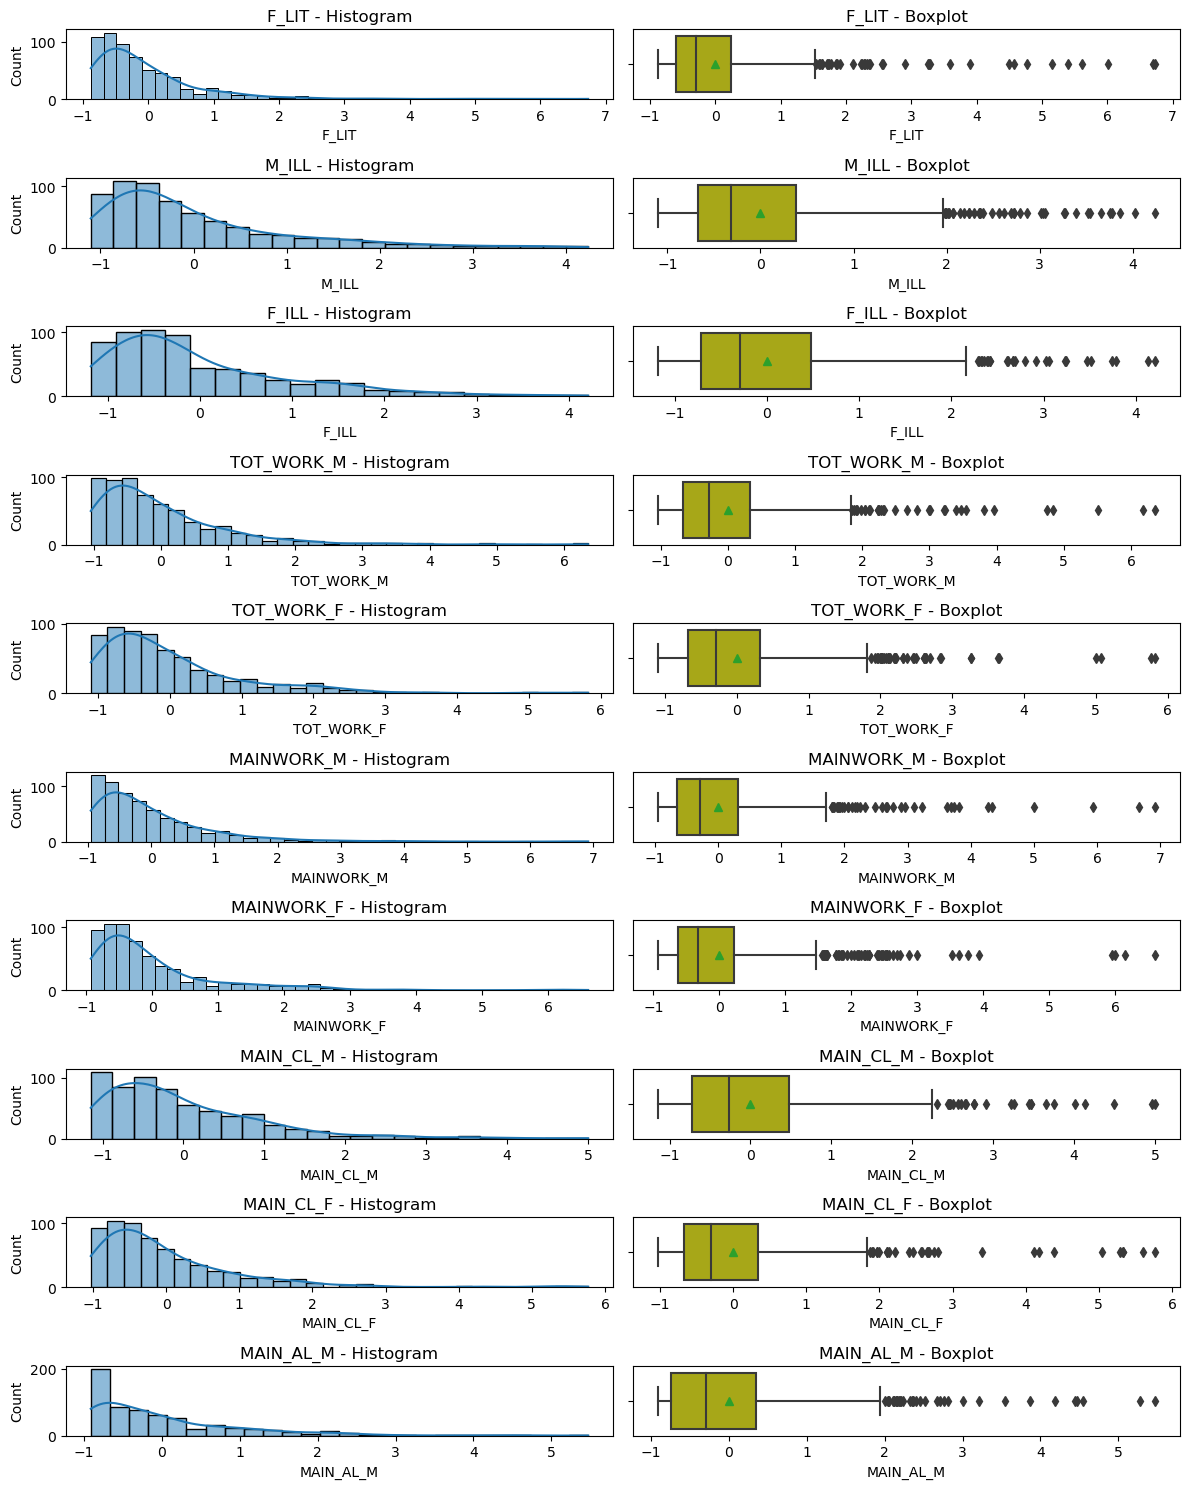

In [109]:
fig, axs = plt.subplots(len(numerical_cols[10:20]),2,figsize=(12,15))
for row_id,col in enumerate(numerical_cols[10:20]):
    sns.histplot(x=df_pca_num_scaled[col], kde=1, ax=axs[row_id,0])
    axs[row_id,0].set_title(f'{col} - Histogram')
    
    sns.boxplot(x=df_pca_num_scaled[col], showmeans=1, ax=axs[row_id,1], color='y')
    axs[row_id,1].set_title(f'{col} - Boxplot')
plt.tight_layout()
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

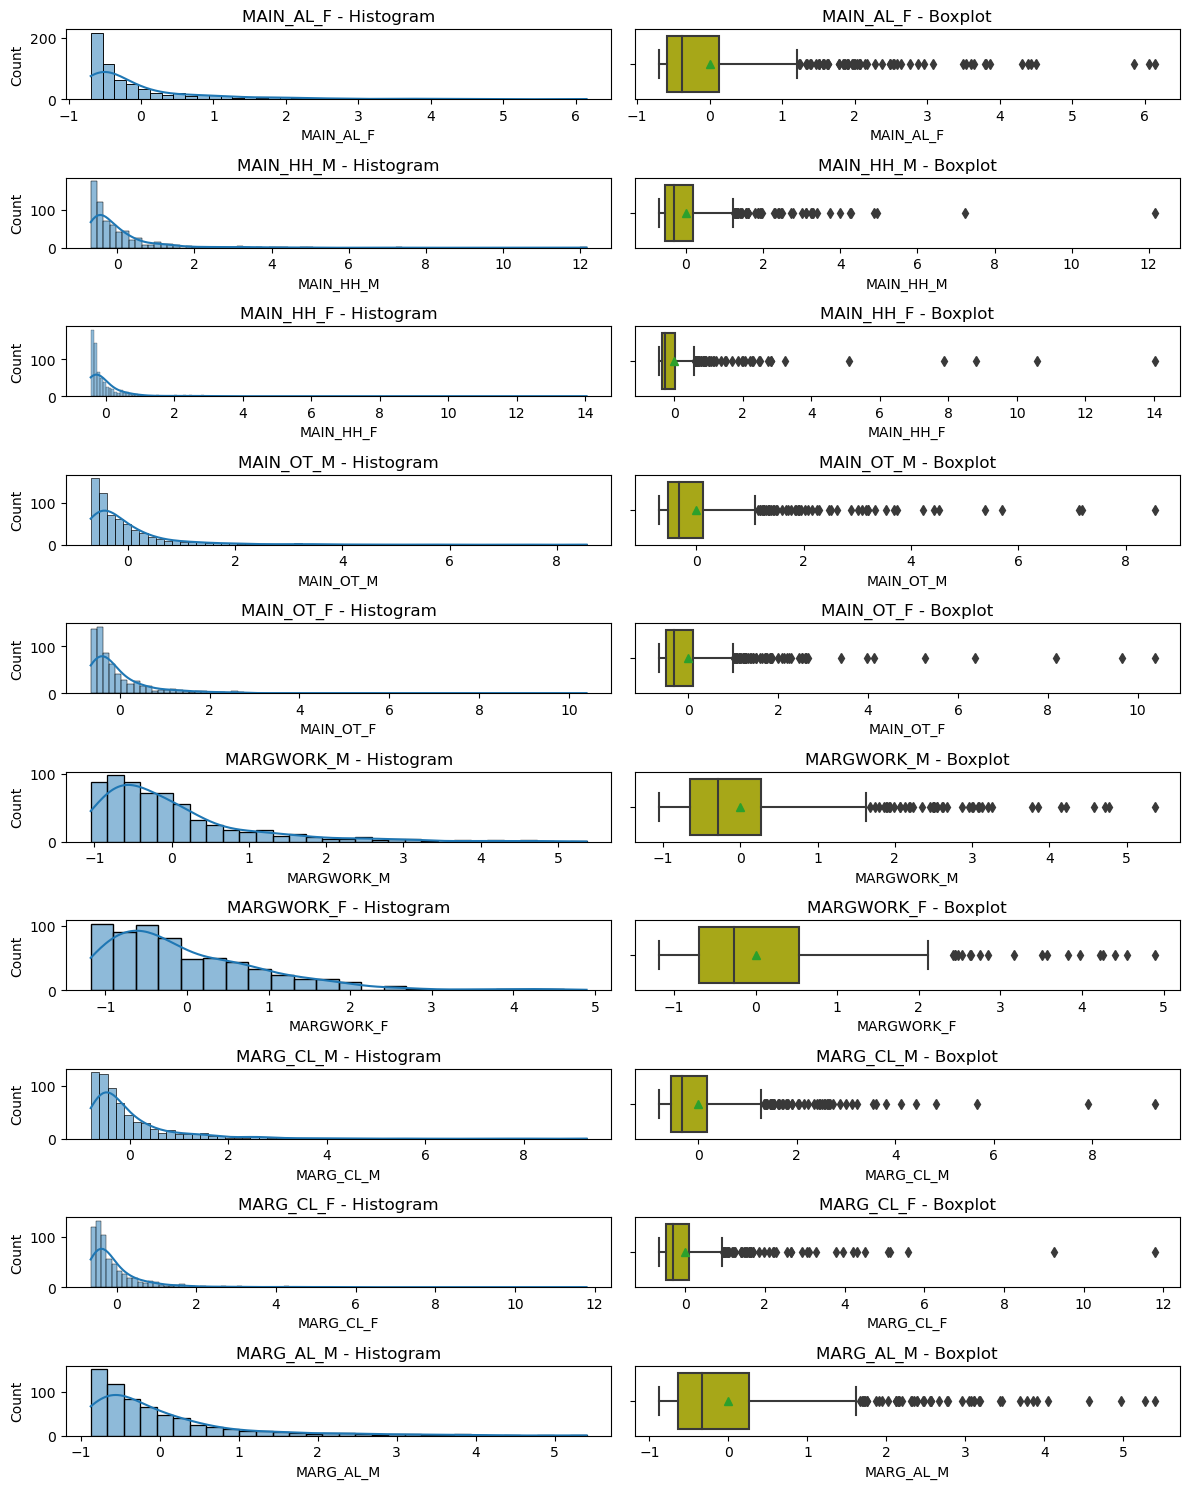

In [110]:
fig, axs = plt.subplots(len(numerical_cols[20:30]),2,figsize=(12,15))
for row_id,col in enumerate(numerical_cols[20:30]):
    sns.histplot(x=df_pca_num_scaled[col], kde=1, ax=axs[row_id,0])
    axs[row_id,0].set_title(f'{col} - Histogram')
    
    sns.boxplot(x=df_pca_num_scaled[col], showmeans=1, ax=axs[row_id,1], color='y')
    axs[row_id,1].set_title(f'{col} - Boxplot')
plt.tight_layout()
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

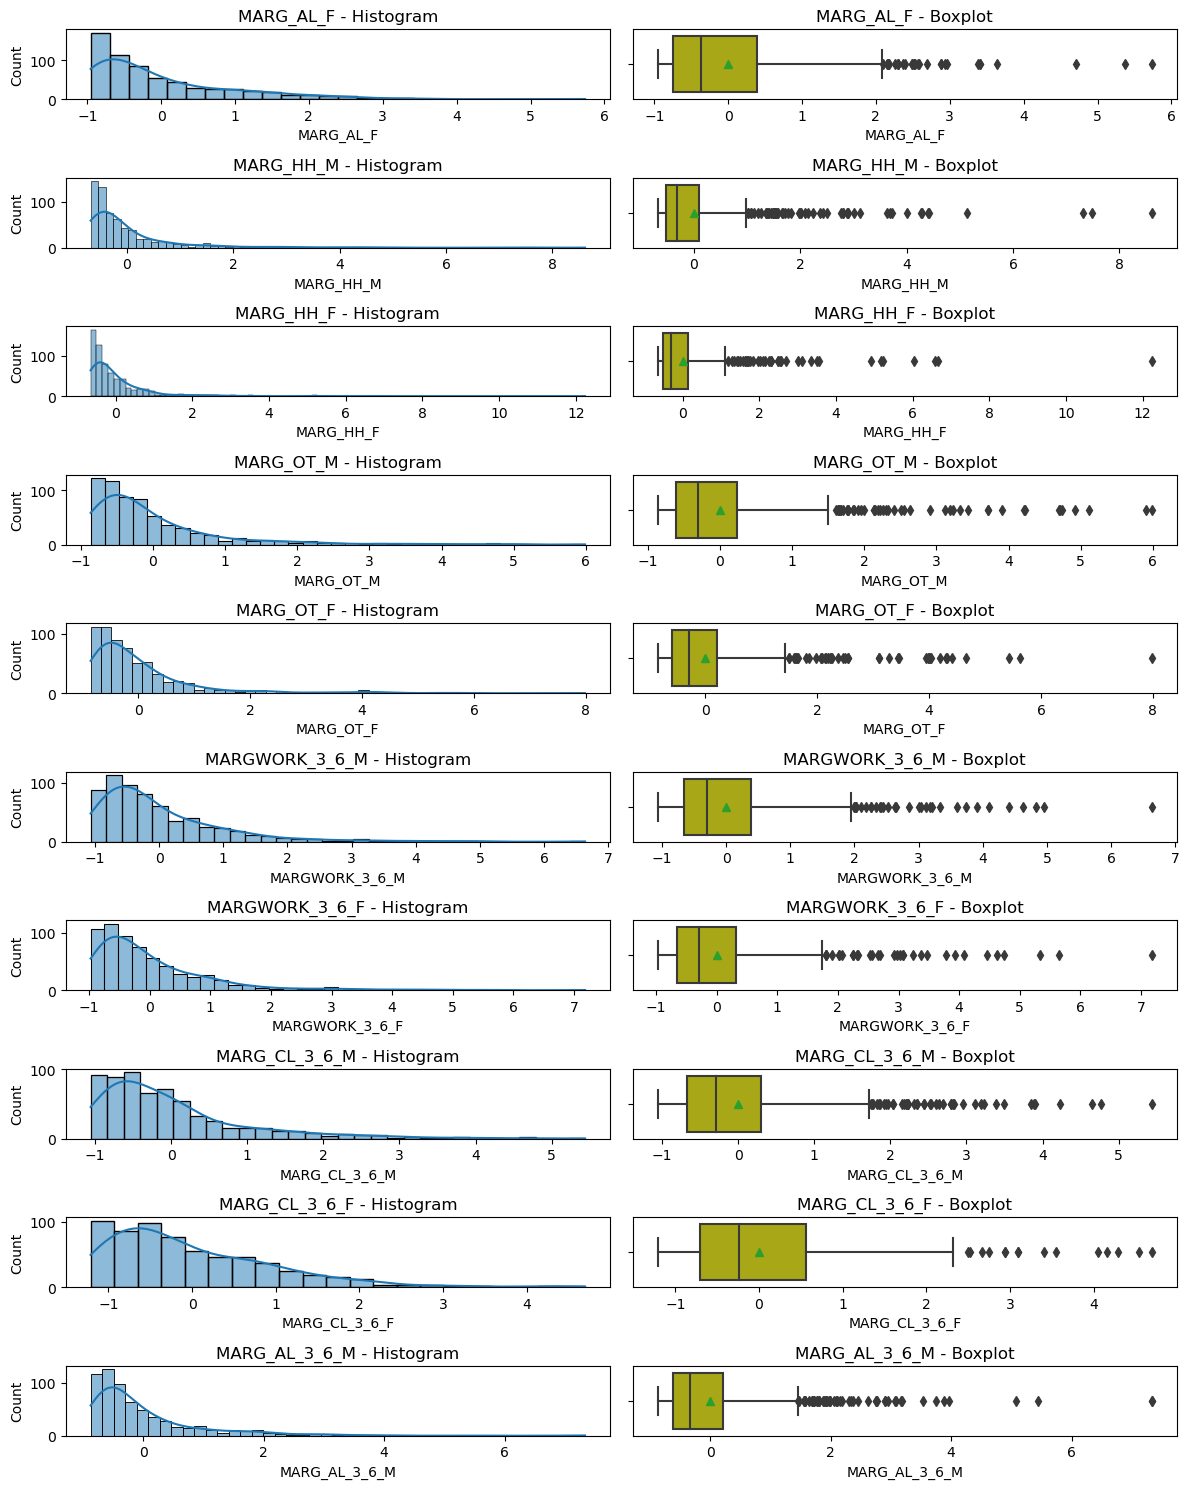

In [111]:
fig, axs = plt.subplots(len(numerical_cols[30:40]),2,figsize=(12,15))
for row_id,col in enumerate(numerical_cols[30:40]):
    sns.histplot(x=df_pca_num_scaled[col], kde=1, ax=axs[row_id,0])
    axs[row_id,0].set_title(f'{col} - Histogram')
    
    sns.boxplot(x=df_pca_num_scaled[col], showmeans=1, ax=axs[row_id,1], color='y')
    axs[row_id,1].set_title(f'{col} - Boxplot')
plt.tight_layout()
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

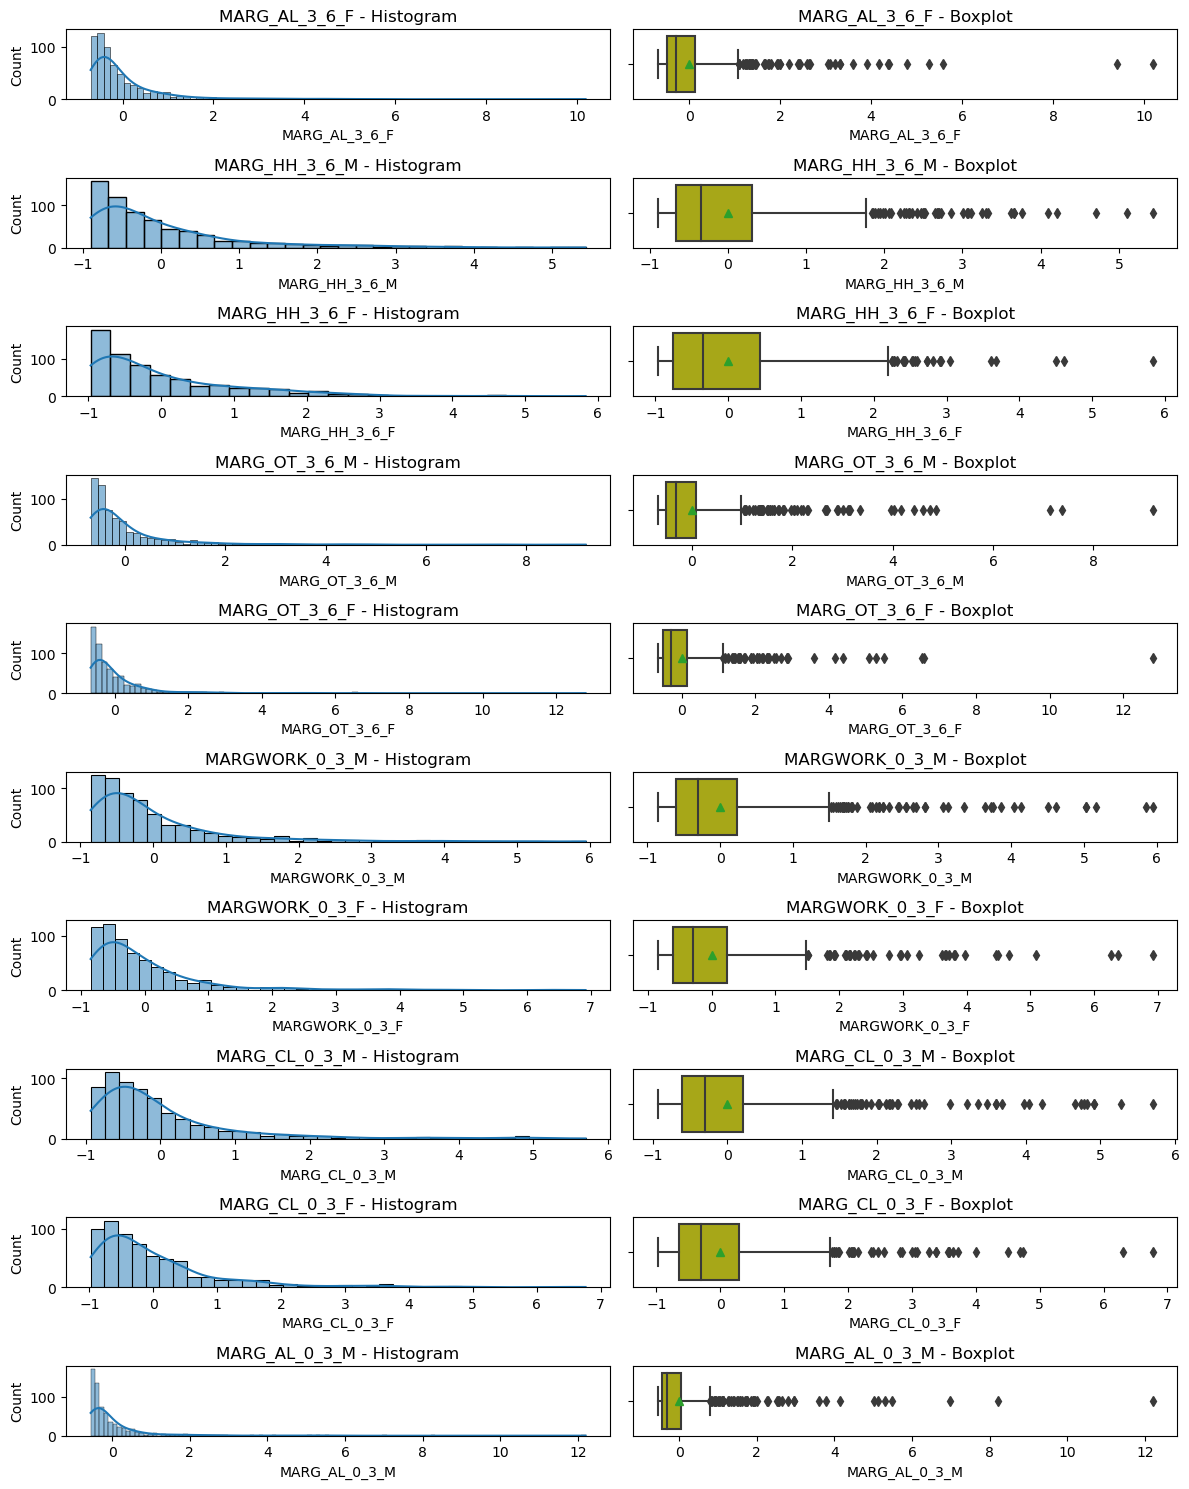

In [112]:
fig, axs = plt.subplots(len(numerical_cols[40:50]),2,figsize=(12,15))
for row_id,col in enumerate(numerical_cols[40:50]):
    sns.histplot(x=df_pca_num_scaled[col], kde=1, ax=axs[row_id,0])
    axs[row_id,0].set_title(f'{col} - Histogram')
    
    sns.boxplot(x=df_pca_num_scaled[col], showmeans=1, ax=axs[row_id,1], color='y')
    axs[row_id,1].set_title(f'{col} - Boxplot')
plt.tight_layout()
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

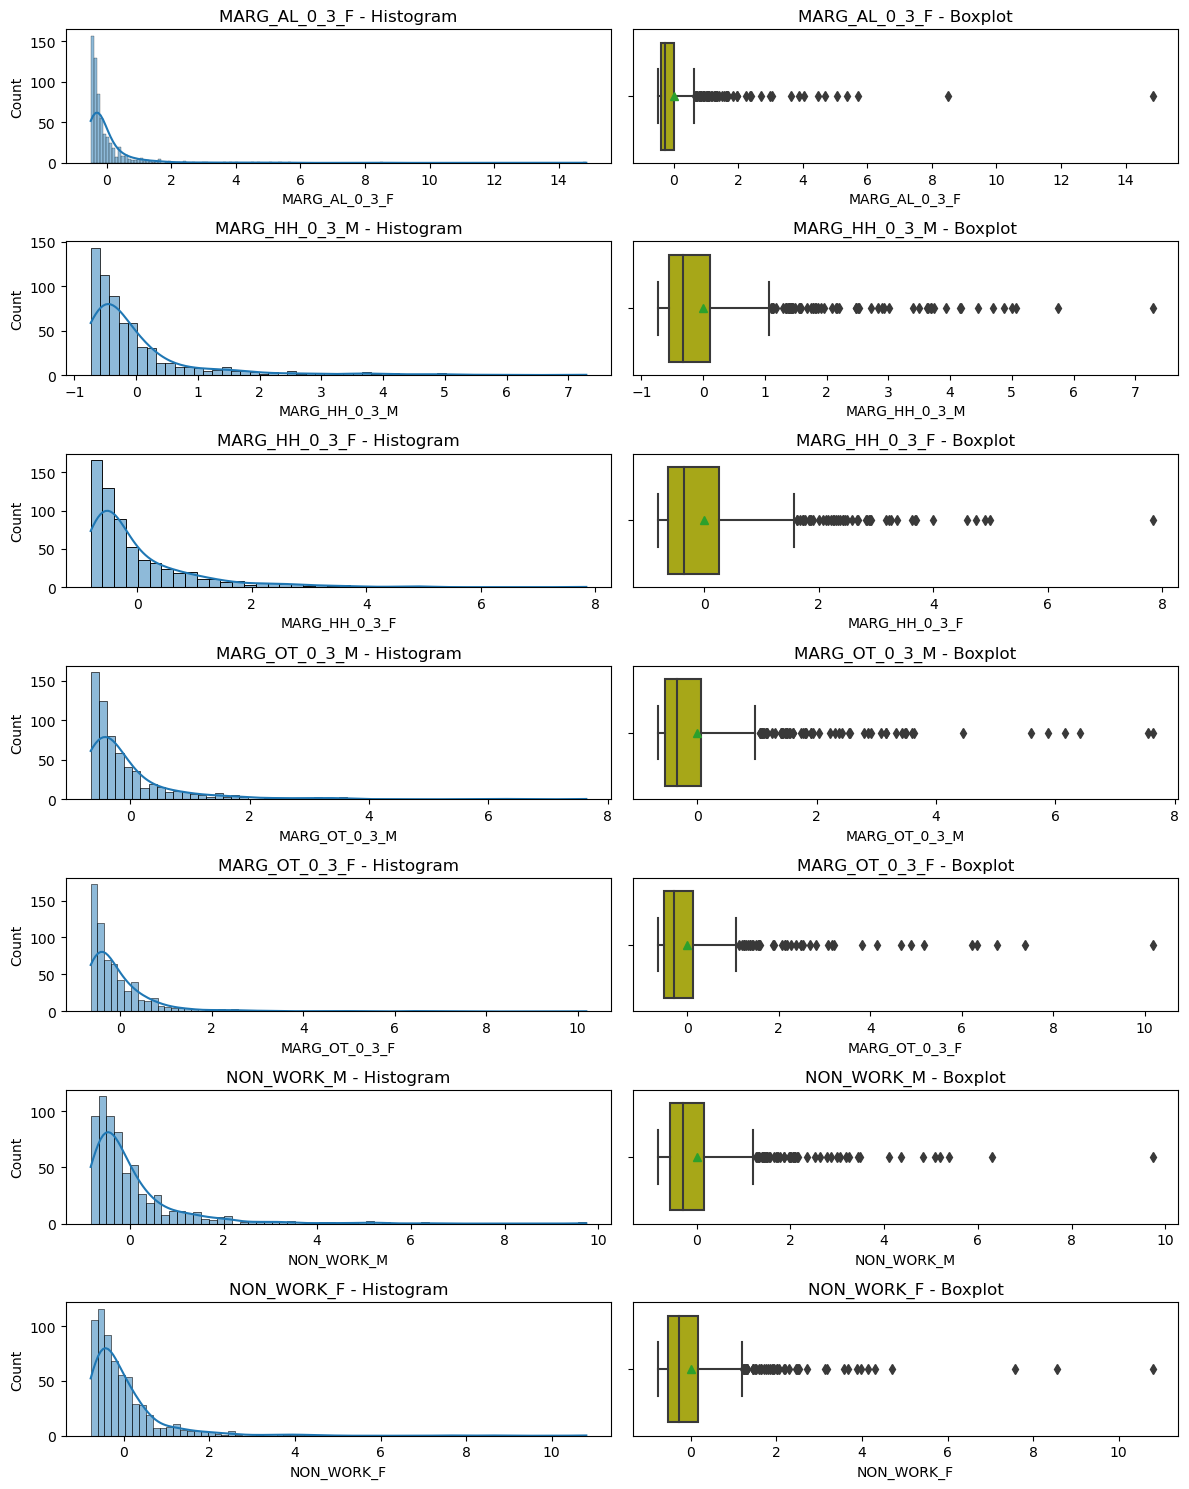

In [113]:
fig, axs = plt.subplots(len(numerical_cols[50:]),2,figsize=(12,15))
for row_id,col in enumerate(numerical_cols[50:]):
    sns.histplot(x=df_pca_num_scaled[col], kde=1, ax=axs[row_id,0])
    axs[row_id,0].set_title(f'{col} - Histogram')
    
    sns.boxplot(x=df_pca_num_scaled[col], showmeans=1, ax=axs[row_id,1], color='y')
    axs[row_id,1].set_title(f'{col} - Boxplot')
plt.tight_layout()
plt.show();

In [114]:
df_eda.columns

Index(['State Code', 'Dist.Code', 'State', 'Area Name', 'MAINWORK_M',
       'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F',
       'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MainWork_M&F',
       'Main_CL_M&F', 'Main_AL_M&F', 'Main_HH_M&F', 'Main_OT_M&F'],
      dtype='object')

In [115]:
cols_eda = ['MAINWORK_M','MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

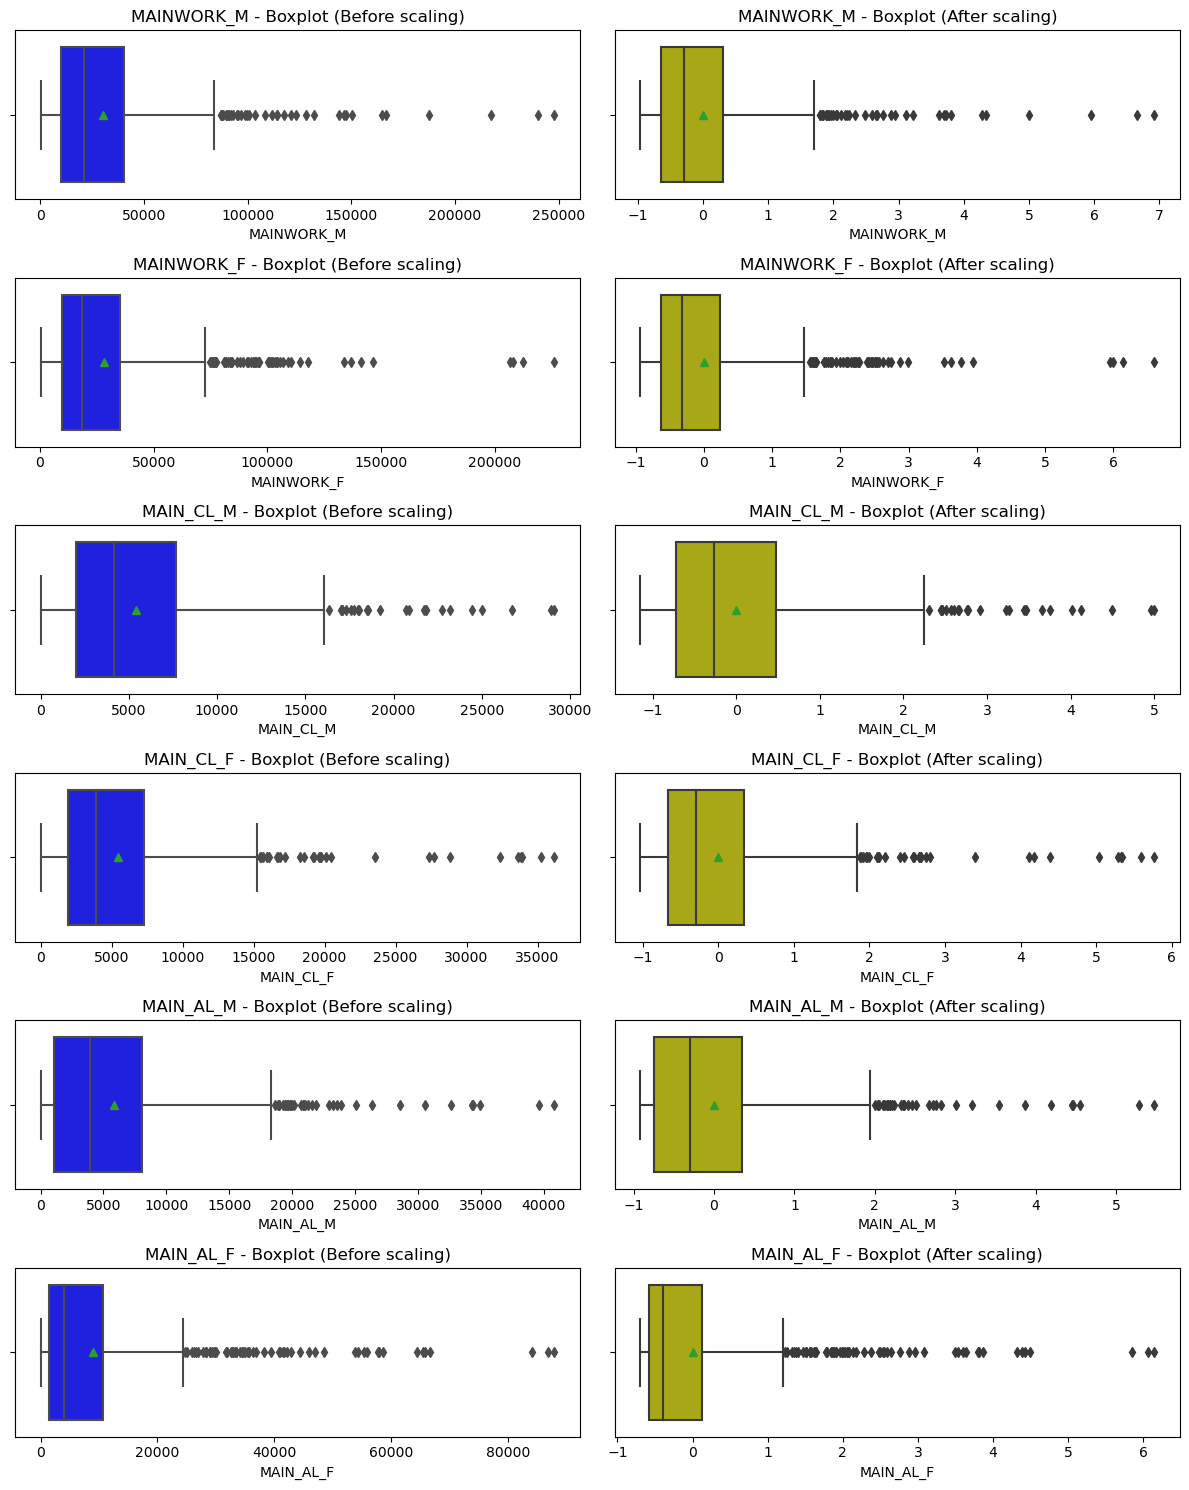

In [116]:
fig, axs = plt.subplots(len(cols_eda),2,figsize=(12,15))
for row_id,col in enumerate(cols_eda):
    sns.boxplot(x=df_pca[col], showmeans=1, ax=axs[row_id,0], color='b')
    axs[row_id,0].set_title(f'{col} - Boxplot (Before scaling)')
    
    sns.boxplot(x=df_pca_num_scaled[col], showmeans=1, ax=axs[row_id,1], color='y')
    axs[row_id,1].set_title(f'{col} - Boxplot (After scaling)')
plt.tight_layout()
plt.show();

* Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix, Get eigen values, and eigen vector.

In [117]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_num_scaled)
p_value

0.0

In [118]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_num_scaled)
kmo_model

0.8039889932781528

In [119]:
df_pca_num_scaled.shape

(640, 57)

In [120]:
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=123)
df_pca_num_scaled_p = pca.fit_transform(df_pca_num_scaled)
df_pca_num_scaled_p.transpose().round(2)

array([[-4.62, -4.77, -5.96, ..., -6.29, -6.22, -5.9 ],
       [ 0.14, -0.11, -0.29, ..., -0.64, -0.67, -0.94],
       [ 0.33,  0.24,  0.37, ...,  0.11,  0.27,  0.35],
       ...,
       [-0.  ,  0.  ,  0.  , ...,  0.  , -0.  , -0.  ],
       [ 0.  ,  0.  , -0.  , ...,  0.  , -0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ..., -0.  ,  0.  , -0.  ]])

In [121]:
print('Eigen Vectors \n',pca.components_.round(2))

Eigen Vectors 
 [[ 0.16  0.17  0.17 ...  0.13  0.15  0.13]
 [-0.13 -0.09 -0.1  ...  0.05 -0.07 -0.07]
 [-0.    0.06  0.04 ... -0.08  0.11  0.1 ]
 ...
 [ 0.    0.21  0.25 ... -0.07  0.   -0.07]
 [ 0.    0.29 -0.21 ...  0.04 -0.03  0.01]
 [-0.    0.19  0.03 ... -0.03 -0.14 -0.02]]


In [122]:
pca.components_[:3].round(2)

array([[ 0.16,  0.17,  0.17,  0.16,  0.16,  0.15,  0.15,  0.03,  0.03,
         0.16,  0.15,  0.16,  0.17,  0.16,  0.15,  0.15,  0.12,  0.1 ,
         0.07,  0.11,  0.07,  0.13,  0.08,  0.12,  0.11,  0.16,  0.16,
         0.08,  0.05,  0.13,  0.11,  0.14,  0.13,  0.16,  0.15,  0.16,
         0.16,  0.17,  0.16,  0.09,  0.05,  0.13,  0.11,  0.14,  0.12,
         0.15,  0.15,  0.15,  0.14,  0.05,  0.04,  0.12,  0.12,  0.14,
         0.13,  0.15,  0.13],
       [-0.13, -0.09, -0.1 , -0.02, -0.02, -0.05, -0.05,  0.03,  0.03,
        -0.12, -0.15, -0.01, -0.01, -0.13, -0.09, -0.18, -0.15,  0.06,
         0.09, -0.03, -0.06, -0.08, -0.08, -0.21, -0.21,  0.09,  0.13,
         0.27,  0.25,  0.17,  0.14,  0.07,  0.02, -0.09, -0.12, -0.04,
        -0.11,  0.08,  0.1 ,  0.26,  0.24,  0.16,  0.13,  0.06,  0.01,
        -0.09, -0.13,  0.15,  0.18,  0.25,  0.24,  0.19,  0.18,  0.08,
         0.05, -0.07, -0.07],
       [-0.  ,  0.06,  0.04,  0.06,  0.05,  0.  , -0.03, -0.12, -0.14,
         0.08,  0

In [123]:
pca.explained_variance_

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

In [124]:
var_exp = pca.explained_variance_ratio_
print(var_exp.round(2))

[0.56 0.14 0.07 0.06 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.  ]


In [125]:
len(var_exp)

57

In [126]:
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage: \n',(cum_var_exp*100).round(2))

<IPython.core.display.Javascript object>

Cumulative Variance Explained in Percentage: 
 [ 55.73  69.51  76.79  83.21  87.08  90.47  92.53  93.85  94.93  95.85
  96.61  97.23  97.75  98.24  98.57  98.81  99.01  99.2   99.37  99.51
  99.61  99.69  99.75  99.81  99.85  99.89  99.92  99.94  99.96  99.97
  99.98  99.99 100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.  ]


In [127]:
# covariance matrix

np.cov(df_pca_num_scaled_p.T)[0]

<IPython.core.display.Javascript object>

array([ 3.18135647e+01,  3.20244613e-15, -6.22697859e-16,  5.67099836e-16,
       -3.55827348e-16,  8.89568370e-17,  1.77913674e-16, -1.86253378e-16,
       -8.89568370e-17, -4.22544976e-16, -2.22392093e-16, -1.11196046e-16,
        1.70790177e-16, -6.67176278e-17,  5.55980231e-17,  3.89186162e-17,
       -1.11196046e-17,  1.22315651e-16, -8.33970347e-17,  3.33588139e-17,
        3.33588139e-17,  1.11196046e-17,  2.22392093e-17,  5.62929984e-17,
       -1.11196046e-17,  7.29724054e-18,  3.33588139e-17, -1.38995058e-17,
       -4.51733938e-17,  3.20557352e-17, -5.55980231e-18, -3.12738880e-17,
       -2.01542834e-17,  4.69108320e-18, -4.86482702e-18, -1.28390507e-31,
       -4.02454859e-31,  2.09869098e-31, -6.29607295e-32, -2.46904822e-32,
        7.40714465e-33,  1.97523857e-32,  8.64166876e-32,  1.23452411e-32,
        3.92578666e-31, -2.88878641e-31, -6.17262054e-32, -2.96285786e-32,
        8.70339496e-32, -1.87647664e-31,  2.96285786e-32, -1.87647664e-31,
        3.95047715e-32, -

* Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

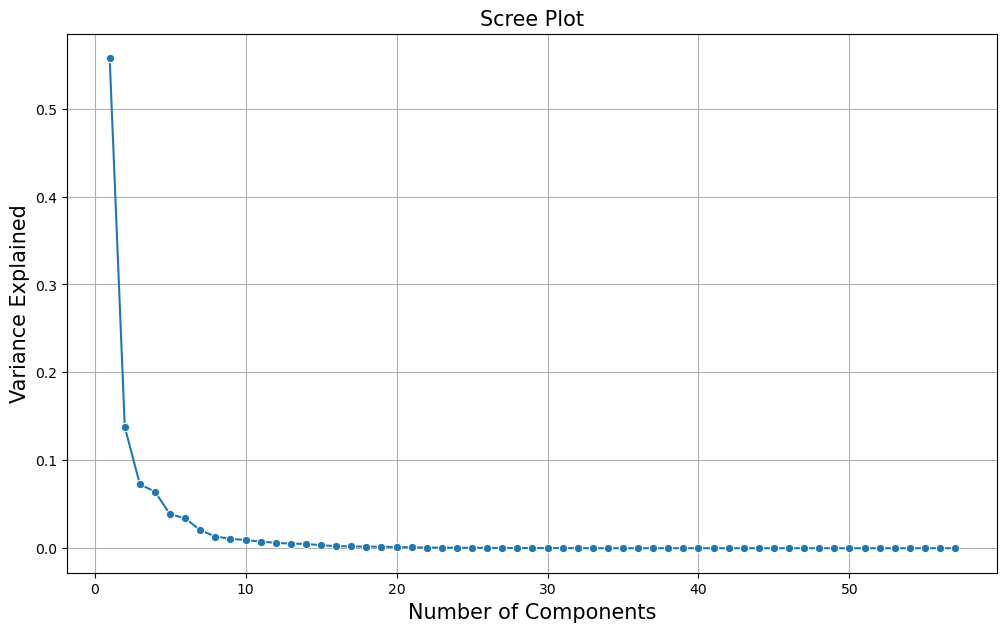

In [128]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

* Let's take 6 PCs which gives us 90.47 variance explained from the data.

In [129]:
from sklearn.decomposition import PCA
# NOTE - we are generating only 6 PCA dimensions (dimensionality reduction from 57 to 6)
pca = PCA(n_components=6, random_state=123)
df_pca_num_scaled_p1 = pca.fit_transform(df_pca_num_scaled)
df_pca_num_scaled_p1.transpose().round(2) # Component output

array([[-4.62, -4.77, -5.96, ..., -6.29, -6.22, -5.9 ],
       [ 0.14, -0.11, -0.29, ..., -0.64, -0.67, -0.94],
       [ 0.33,  0.24,  0.37, ...,  0.11,  0.27,  0.35],
       [ 1.54,  1.96,  0.62, ...,  1.37,  1.14,  1.11],
       [ 0.35, -0.15,  0.48, ...,  0.15,  0.06,  0.15],
       [-0.42,  0.42,  0.28, ...,  0.14, -0.12, -0.15]])

In [130]:
df_pca_num_scaled_p1.shape

(640, 6)

In [131]:
pca.components_

array([[ 1.56020579e-01,  1.67117635e-01,  1.65553179e-01,
         1.62192948e-01,  1.62566396e-01,  1.51357849e-01,
         1.51566500e-01,  2.72341946e-02,  2.81833150e-02,
         1.61992837e-01,  1.46872680e-01,  1.61749445e-01,
         1.65248187e-01,  1.59871988e-01,  1.45935804e-01,
         1.46200730e-01,  1.23970284e-01,  1.03127159e-01,
         7.45397856e-02,  1.13355712e-01,  7.38821590e-02,
         1.31572584e-01,  8.33826397e-02,  1.23526242e-01,
         1.11021264e-01,  1.64615479e-01,  1.55395618e-01,
         8.23885414e-02,  4.91953957e-02,  1.28598563e-01,
         1.14305073e-01,  1.40853227e-01,  1.27669598e-01,
         1.55262872e-01,  1.47286584e-01,  1.64971950e-01,
         1.61253433e-01,  1.65501611e-01,  1.55647049e-01,
         9.30142064e-02,  5.15358640e-02,  1.28576116e-01,
         1.10645843e-01,  1.39592763e-01,  1.24545909e-01,
         1.54293786e-01,  1.46285654e-01,  1.50125706e-01,
         1.40157047e-01,  5.25417829e-02,  4.17859530e-0

In [132]:
var_exp = pca.explained_variance_ratio_
print(var_exp.round(2))

[0.56 0.14 0.07 0.06 0.04 0.03]


In [133]:
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

<IPython.core.display.Javascript object>

Cumulative Variance Explained in Percentage: [55.73 69.51 76.79 83.21 87.08 90.47]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

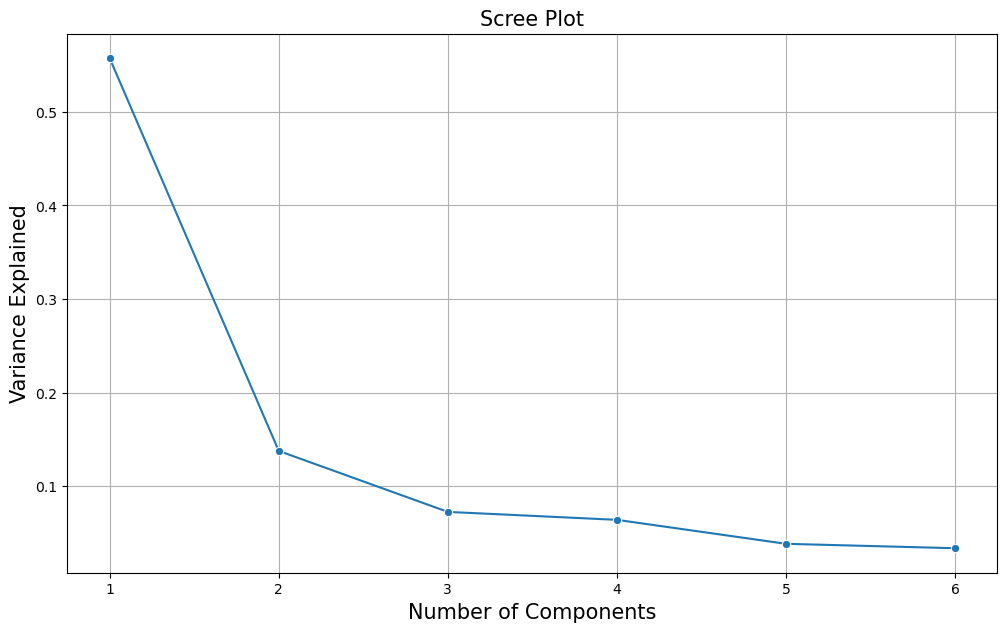

In [134]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [135]:
df_pca_loading = pd.DataFrame(pca.components_.round(2),columns=list(df_pca_num_scaled))
df_pca_loading.shape

<IPython.core.display.Javascript object>

(6, 57)

In [136]:
df_pca_loading

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  F_ST  M_LIT  ...  \
0   0.16   0.17   0.17  0.16  0.16  0.15  0.15  0.03  0.03   0.16  ...   
1  -0.13  -0.09  -0.10 -0.02 -0.02 -0.05 -0.05  0.03  0.03  -0.12  ...   
2  -0.00   0.06   0.04  0.06  0.05  0.00 -0.03 -0.12 -0.14   0.08  ...   
3  -0.13  -0.02  -0.07  0.01  0.01  0.01 -0.03 -0.22 -0.23  -0.04  ...   
4  -0.01  -0.03  -0.01 -0.05 -0.04 -0.17 -0.16  0.43  0.44  -0.01  ...   
5   0.00  -0.07  -0.04 -0.16 -0.15 -0.06 -0.04  0.22  0.23  -0.06  ...   

   MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  \
0           0.15           0.14           0.05           0.04           0.12   
1           0.15           0.18           0.25           0.24           0.19   
2           0.05           0.02           0.27           0.28          -0.14   
3           0.09          -0.02          -0.10          -0.14           0.13   
4           0.08           0.13          -0.05          -0.05           0.06   
5          -0.06          -0.00           0.07           0.08          -0.12   

   MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0           0.12           0.14           0.13        0.15        0.13  
1           0.18           0.08           0.05       -0.07       -0.07  
2          -0.20          -0.02          -0.08        0.11        0.10  
3           0.00           0.23           0.21        0.08        0.02  
4           0.13          -0.04           0.00        0.16        0.24  
5          -0.11           0.06           0.30       -0.05       -0.02  

[6 rows x 57 columns]

In [137]:
from matplotlib.patches import Rectangle

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

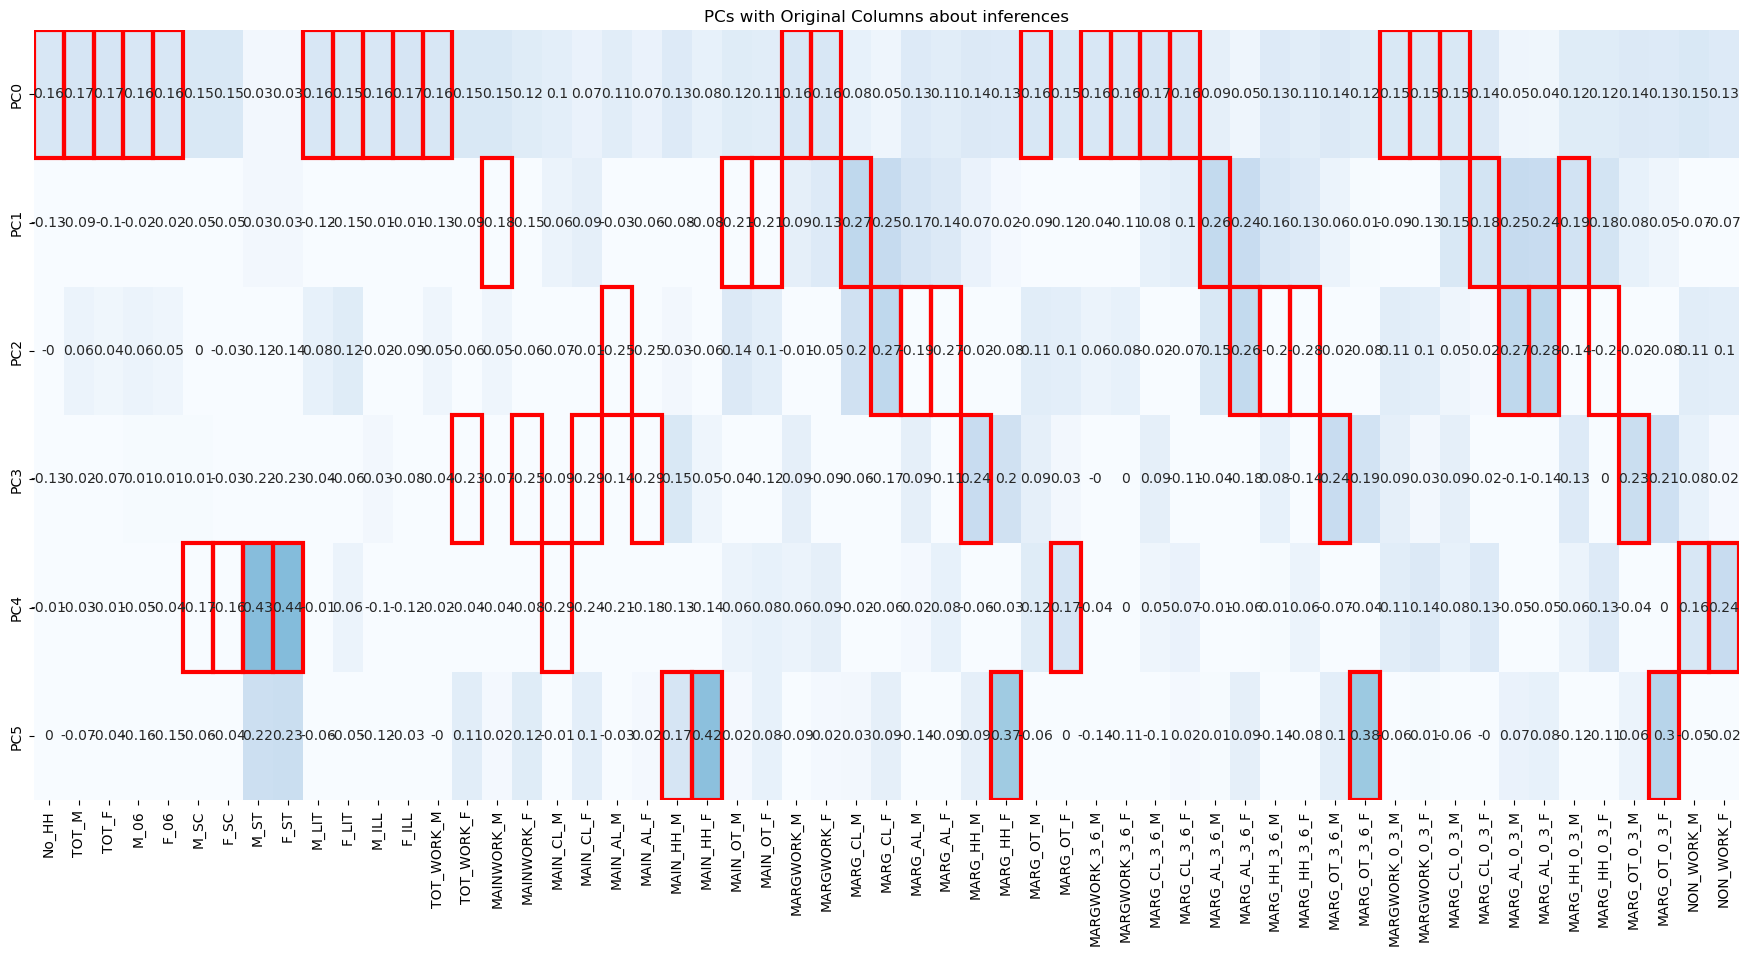

In [138]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5'])

column_max = df_pca_loading.abs().idxmax(axis=0)
plt.title('PCs with Original Columns about inferences')
for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

* Write linear equation for first PC.

In [139]:
f = []
for i in range(0,57):
    val = np.round(pca.components_[0][i],2)
    col = df_pca_num_scaled.columns[i]
    s = f'({val})*{col}'
    f.append(s)
    print("(",np.round(pca.components_[0][i],2),")",'*',df_pca_num_scaled.columns[i], end=' + ')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.16 ) * No_HH + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.17 ) * TOT_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.17 ) * TOT_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.16 ) * M_06 + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.16 ) * F_06 + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.15 ) * M_SC + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.15 ) * F_SC + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.03 ) * M_ST + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.03 ) * F_ST + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.16 ) * M_LIT + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.15 ) * F_LIT + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.16 ) * M_ILL + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.17 ) * F_ILL + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.16 ) * TOT_WORK_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.15 ) * TOT_WORK_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.15 ) * MAINWORK_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.12 ) * MAINWORK_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.1 ) * MAIN_CL_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.07 ) * MAIN_CL_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.11 ) * MAIN_AL_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.07 ) * MAIN_AL_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.13 ) * MAIN_HH_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.08 ) * MAIN_HH_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.12 ) * MAIN_OT_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.11 ) * MAIN_OT_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.16 ) * MARGWORK_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.16 ) * MARGWORK_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.08 ) * MARG_CL_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.05 ) * MARG_CL_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.13 ) * MARG_AL_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.11 ) * MARG_AL_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.14 ) * MARG_HH_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.13 ) * MARG_HH_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.16 ) * MARG_OT_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.15 ) * MARG_OT_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.16 ) * MARGWORK_3_6_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.16 ) * MARGWORK_3_6_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.17 ) * MARG_CL_3_6_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.16 ) * MARG_CL_3_6_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.09 ) * MARG_AL_3_6_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.05 ) * MARG_AL_3_6_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.13 ) * MARG_HH_3_6_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.11 ) * MARG_HH_3_6_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.14 ) * MARG_OT_3_6_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.12 ) * MARG_OT_3_6_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.15 ) * MARGWORK_0_3_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.15 ) * MARGWORK_0_3_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.15 ) * MARG_CL_0_3_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.14 ) * MARG_CL_0_3_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.05 ) * MARG_AL_0_3_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.04 ) * MARG_AL_0_3_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.12 ) * MARG_HH_0_3_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.12 ) * MARG_HH_0_3_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.14 ) * MARG_OT_0_3_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.13 ) * MARG_OT_0_3_F + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.15 ) * NON_WORK_M + 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

( 0.13 ) * NON_WORK_F + 

In [140]:
'  +  '.join(f)

'(0.16)*No_HH  +  (0.17)*TOT_M  +  (0.17)*TOT_F  +  (0.16)*M_06  +  (0.16)*F_06  +  (0.15)*M_SC  +  (0.15)*F_SC  +  (0.03)*M_ST  +  (0.03)*F_ST  +  (0.16)*M_LIT  +  (0.15)*F_LIT  +  (0.16)*M_ILL  +  (0.17)*F_ILL  +  (0.16)*TOT_WORK_M  +  (0.15)*TOT_WORK_F  +  (0.15)*MAINWORK_M  +  (0.12)*MAINWORK_F  +  (0.1)*MAIN_CL_M  +  (0.07)*MAIN_CL_F  +  (0.11)*MAIN_AL_M  +  (0.07)*MAIN_AL_F  +  (0.13)*MAIN_HH_M  +  (0.08)*MAIN_HH_F  +  (0.12)*MAIN_OT_M  +  (0.11)*MAIN_OT_F  +  (0.16)*MARGWORK_M  +  (0.16)*MARGWORK_F  +  (0.08)*MARG_CL_M  +  (0.05)*MARG_CL_F  +  (0.13)*MARG_AL_M  +  (0.11)*MARG_AL_F  +  (0.14)*MARG_HH_M  +  (0.13)*MARG_HH_F  +  (0.16)*MARG_OT_M  +  (0.15)*MARG_OT_F  +  (0.16)*MARGWORK_3_6_M  +  (0.16)*MARGWORK_3_6_F  +  (0.17)*MARG_CL_3_6_M  +  (0.16)*MARG_CL_3_6_F  +  (0.09)*MARG_AL_3_6_M  +  (0.05)*MARG_AL_3_6_F  +  (0.13)*MARG_HH_3_6_M  +  (0.11)*MARG_HH_3_6_F  +  (0.14)*MARG_OT_3_6_M  +  (0.12)*MARG_OT_3_6_F  +  (0.15)*MARGWORK_0_3_M  +  (0.15)*MARGWORK_0_3_F  +  (0.15)*MARG_C